**В своей работе я ставила следующие задачи:**
1. Медиаанализ - проанализировать динамику рейтингов, распределение рейтингов в зависимости от различных факторов (программа, прайм-не прайм, время начала передачи, телеканал и т.д.)

Рекламодатели могут использовать данную информацию для планирования рекламной компании (оценка бюджета, кол-ва рейтингов). 
Рекламоносители - для планирования бюджетов канала, стоимости рейтингов, программного планирования. 

2. Прогнозирование рейтингов на следующие 2 года - 
прогноз общих рейтингов (суммарных) и прогноз общих рейтингов конкретного телеканала. 

Рекламодатели и рекламоносители - для планирования медиабюджетов (бюджет = рейтинги * цену рейтинга). 


3. Медиапрогнозирование рейтингов программ (для конкретного канала) - спрогнозировать рейтинги программы исходя из многофакторного анализа.

Рекламодатели могут рассчитывать эффективность программы (если программа принесет столько-то рейтингов (денег), то какой может быть бюджет программы);
рекламодатели могут прогнозировать и оптимизировать рекламные бюджеты, планируя поставновки или спонсорство в конкретных передачах

**Источник данных:**
Основные данные по телесмотрению за послених 3 года были взяты из официальной программы Palomars (TNS Gallup)

**Какие зависимости я хочу исследовать, на какие вопросы по данным я хочу ответить?**
Есть ли в данных сезонность?
С какими другими факторами взаимосвязаны рейтинги?
Какой алгоритм лучше всего (по метрикам качества) сможет строить прогноз?
С какой точностью можно спрогнозировать рейтинги передач исходя из категориальных признаков?

**Какие подходы я хочу попробовать и почему?** 
1. Визуализация данных
2. Линейная регрессия - (для прогнозирования общих рейтингов и рейтингов программы исходя из множественных факторов)
3. Prophet - для анализа временных рядов (прогнозирования рейтингов на следующий год)
4. Catboost для множественное регрессии и категориальных признаков (прогнозирование рейтингов передачи)

**Какова целевая функция, как оценить результат?**
При прогнозировании основными показателями качества будут Mean Squared Error (MSE) и Mean Absolute Error (MAPE)


**Общая информация о данных**

**Данные для анализа**:

1. база TNS Gallup Media 

2. Россия 100+ (для городов с населением >100т. Так как база 0+ используется меньше года)

3. период с 1.09.17-2.09.20

4. только домашнее телесмотрение ("дача" не включается, так как мониторинг с дачей меньше года)

5. федеральная реклама

6. данные для дефолтной общей аудитории (Все 4+). Хотя для разных телеканалов расчетная баинговая аудитория для покупки рейтингов различаются. Но для сравнения лучше пользоваться единой. Принцип анализа идентичен.

7. за эфирное событие брала программы, а не рекламные блоки или ролики, чтобы посчитать "общий инвентарь". Так как данные по рекламным блокам больше подвержены различным факторам (законодательное время рекламы, фактическая продажа рекламы и т.д). 

8. основным показателем, который оценивает объем рынка (бюджета) -считаю стандартный приведенный рейтинг (St.TVR(20')), так как именно их продают телеканалы (с поправкой на аудиторию). Описание показателей см. ниже

**Описание основных показателей:**

'Название_передачи' - название передачи

'время_начала'      - время начала передачи (H:M:S)    

'время_окончания'   - время начала передачи (H:M:S)  

'День_недели'       - день недели

"День_тип'          - выходной/рабочий

"Дата'              - D:M:Y

"Телекомпания'      - не использую

'Телекомпания_оригинала' - использую

"Программа_жанр_'   - жанр программы (9 категорий) 

'Программа_категория' - более подробная классификация (65 категорий)

'Длительность'       - длительность (H:M:S) 

'TVR'   - Рейтинг передачи  (рекламного  блока,  временного  промежутка)  c  учетом  продолжительности просмотра  и  выражается  в  процентах  от  целевой  группы.  Рейтинг  представляет  собой  Audience, выраженный в % от целевой группы.Каждому  зрителю,  переключавшемуся  на  данный  канал  в  течение  данной  передачи  (рекламного блока,   временного   промежутка),   присваивается   определенный   вкладв   зависимости   от продолжительности  просмотра.  Так,  зрителю,  просмотревшему  всю  передачу  от  начала  до  конца присваивается  вклад1,  смотревшему  половину  передачи -0.5,  треть  передачи -0.3333  ит.д. Подсчитывается сумма вкладови делится на количество респондентов -членов целевой группы. Отражает ср.рейтинг события без учета времени события

'St.TVR(20`)'        - Данная   статистика   представляет   собой   TVR   события,   приведенный   к   некоторой «стандартной» длительности. Основное  назначение  новой  статистики –удобный  и  быстрый  подсчет  «покупаемых» (на данный момент, 20-секундных) рейтингов для группы событий. Рассчитывается как 
TVR события * Длительность события (сек) / стандартная Длительность (сек) (сейчас используется 20").
Отражает рейтинг с учетом длительности времени эфирного события

**Добавленные данные**:
'Час_начала'         - час от времени начала передачи  
'Длительность(сек)' -  длительность в секундах
'Прайм' =            - 1(прайм -выходные и будни с 18-23), 0 - остальные
"St. TVR" - st.TVR эфирного события (без приведения к стандарту). Расчитываем как TVR * длительность события (сек)
'Год' 
"Квартал","Квартал_год" - номер квартала и квартал с годом (для дианмических отчетов)
 Месяц" и "Месяц_год" - номер квартала и квартал с годом (для дианмических отчетов)
   

# **План работы**

1. Анализ данных
2. Преобразование таблицы для анализа
3. Анализ основных данных + анализ "хитов" (телеканалы,программы и т.д.)
4. Анализ динамики
5. Прогнозирование рейтингов на основе модели prophet (построение общей модели+оптимизация модели)
6. Прогнозирование рейтингов на основе линейной регрессии (построение общей модели+оптимизация модели)
7. Сравнение моделей по основным критериям ошибки
8. Анализ коррелирующих с рейтингами факторов
9. Построение множественной линейной регрессии для прогнозирования рейтингов передач


In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
pd.set_option('precision', 3)
from fbprophet import Prophet
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric


import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error as mse

In [ ]:

# from google.colab import files
# uploaded = files.upload()

In [ ]:

from google.colab import drive
drive.mount('/content/mntDrive')


Drive already mounted at /content/mntDrive; to attempt to forcibly remount, call drive.mount("/content/mntDrive", force_remount=True).


In [ ]:

df1 = pd.read_excel("/content/mntDrive/My Drive/Финальный проект МФТИ/Финальный_проект17-18(1).xlsx")
df2 = pd.read_excel("/content/mntDrive/My Drive/Финальный проект МФТИ/Финальный_проект18-19(1).xlsx")
df3 = pd.read_excel("/content/mntDrive/My Drive/Финальный проект МФТИ/Финальный_проект19-20(1).xlsx")

TVR_file = pd.concat([df1,df2,df3],ignore_index = True)
TVR_file.head()

#len(df1)+len(df2)+len(df3) == len(TVR_file)
#print(len(df1),len(df2),len(df3))

,Программа,Программа время начала,Программа время окончания,День недели,День тип,Дата,Телекомпания,Телекомпания оригинала,Программа жанр,Программа категория,Длительность,Unnamed: 11,Дом
0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,nan,Stand. TVR (20)
1,Футбол. Чемпионат мира 2018. Отборочный турнир,05:00:00,05:40:07,Пятница,Рабочий,2017-09-01,МАТЧ ТВ (СЕТЕВОЕ ВЕЩАНИЕ),МАТЧ ТВ (СЕТЕВОЕ ВЕЩАНИЕ),Спортивная программа,Трансляция спортивного мероприятия,00:40:07,nan,14.32
2,Комеди Клаб,05:00:00,05:00:22,Пятница,Рабочий,2017-09-01,ТНТ 4 (СЕТЕВОЕ ВЕЩАНИЕ),ТНТ 4 (СЕТЕВОЕ ВЕЩАНИЕ),Развлекательная программа,Юмористическая передача,00:00:22,nan,0.04
3,Махинаторы,05:00:00,05:12:00,Пятница,Рабочий,2017-09-01,DISCOVERY CHANNEL (ДО 31/12/2019) (СЕТЕВОЕ ВЕЩ...,DISCOVERY CHANNEL (ДО 31/12/2019) (СЕТЕВОЕ ВЕЩ...,Кинопрограмма,Документальный сериал,00:12:00,nan,0.34
4,Гимн России,05:00:00,05:00:11,Пятница,Рабочий,2017-09-01,ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ),ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ),Прочее,"Заставка, служебная передача",00:00:11,nan,0.06


Смотрим данные в таблице

---



In [ ]:
TVR_file.head(5)
print("shape: ",TVR_file.shape,'\n') 
print("info: ",TVR_file.info(),'\n')
print("columns: ",TVR_file.columns)



shape:  (1602127, 13) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602127 entries, 0 to 1602126
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Программа                  1602124 non-null  object        
 1   Программа время начала     1602124 non-null  object        
 2   Программа время окончания  1602124 non-null  object        
 3   День недели                1602124 non-null  object        
 4   День тип                   1602124 non-null  object        
 5   Дата                       1602124 non-null  datetime64[ns]
 6   Телекомпания               1602124 non-null  object        
 7   Телекомпания оригинала     1602124 non-null  object        
 8   Программа жанр             1602124 non-null  object        
 9   Программа категория        1602124 non-null  object        
 10  Длительность               1602124 non-null  object        
 11  Unnamed: 11  

Удаление дубликатов и проверка

In [ ]:
#TVR_file[TVR_file.duplicated() == True]
TVR_file.duplicated().sum()

2765

In [ ]:
TVR_file = TVR_file.drop_duplicates()
TVR_file.shape

(1599362, 13)

## **Преобразование таблицы**:
1. сортировка по дате
2. удаление нулевых данных
3. переименование столбцов
4. изменение формата данных на числовые и дата-время
5. добавление столбцов

In [ ]:
TVR_file = TVR_file.sort_values(["Дата"])

In [ ]:
TVR_file = TVR_file.dropna(axis=1,how="all")

TVR_file = TVR_file.dropna(axis=0,how="any")

# sum(TVR_file.isnull().sum())


In [ ]:
TVR_file = TVR_file.rename(columns = {"Дом":"St.TVR(20`)",'Программа время начала':"время начала",'Программа время окончания': "время окончания"})
TVR_file = TVR_file.rename(columns = lambda col: col.replace(" ","_"))
# TVR_file.head()

In [ ]:
TVR_file["St.TVR(20`)"] = TVR_file["St.TVR(20`)"].astype(float)
#TVR_file.head()



ValueError: ignored

In [ ]:
TVR_file["Длительность(сек)"] = TVR_file["Длительность"]
TVR_file["Длительность(сек)"] = pd.to_datetime(TVR_file["Длительность(сек)"].astype(str)).dt.hour*3600 +\
                                pd.to_datetime(TVR_file["Длительность(сек)"].astype(str)).dt.minute*60 +\
                                pd.to_datetime(TVR_file["Длительность(сек)"].astype(str)).dt.second

In [ ]:
TVR_file["время_начала"]= pd.to_datetime(TVR_file["время_начала"].astype(str))
TVR_file["время_окончания"]= pd.to_datetime(TVR_file["время_окончания"].astype(str))
TVR_file["время_начала"] = TVR_file["время_начала"].dt.strftime("%H:%M:%S")
TVR_file["время_окончания"] = TVR_file["время_окончания"].dt.strftime("%H:%M:%S")



In [ ]:
TVR_file["время_начала"]= pd.to_datetime(TVR_file["время_начала"].astype(str))
TVR_file["Час_начала"] = TVR_file["время_начала"].dt.hour.astype(int)
# второй способ
# TVR_file["Час_начала"] = TVR_file["Час_начала"].dt.strftime("%H").astype(int)


In [ ]:
def prime_or_not(str):
  if str["День_тип"] == "Выходной" or 18<=str["Час_начала"]<=23:
    return 1
  else:
    return 0
TVR_file["Прайм"] = TVR_file.apply(prime_or_not,axis=1) 


In [ ]:
TVR_file["St.TVR"] = TVR_file["St.TVR(20`)"] * 20 
TVR_file["St.TVR"] = TVR_file["St.TVR"].round(2)


In [ ]:
TVR_file["TVR"] = TVR_file["St.TVR(20`)"] * 20 / TVR_file["Длительность(сек)"]
TVR_file["TVR"] = TVR_file["TVR"].round(2)


KeyError: ignored

In [ ]:
#TVR_file["Номер_недели"] = TVR_file["Дата"].dt.isocalendar().week

In [ ]:
TVR_file["Год"] = TVR_file["Дата"].dt.year


In [ ]:
TVR_file["Месяц"] = TVR_file["Дата"].dt.month_name()

In [ ]:
kvartal = [1,1,1,2,2,2,3,3,3,4,4,4]
month = ['January','February','March', 'April', 'May', 'June', 'July', 'August','September', 'October', 'November', 'December']
dict_month_kvartal = dict(zip(month,kvartal))

def month_to_kvartal(str):
    month_for = str["Месяц"]
    return dict_month_kvartal[month_for]
    
TVR_file["Квартал"] = TVR_file.apply(month_to_kvartal,axis=1)
#TVR_file

In [ ]:
TVR_file["Месяц_номер"] = TVR_file["Дата"].dt.month.apply(lambda str:"{:2d}".format(str))
TVR_file["Месяц_год"] = TVR_file["Год"].astype(str) + "." + TVR_file["Месяц_номер"].astype(str) 
#TVR_file["Неделя_год"] = TVR_file["Год"].astype(str) + "." + TVR_file["Номер_недели"].astype(str)
TVR_file["Квартал_год"] = TVR_file["Год"].astype(str) + "." + TVR_file["Квартал"].astype(str) 

Смотрим основные показатели данных (средние, медианы....)

In [ ]:
TVR_file.describe()



,St.TVR(20`),Длительность(сек),Час_начала,Прайм,St.TVR,TVR,Год,Квартал
count,1599361.00,1599361.00,1599361.00,1599361.00,1599361.00,1599361.00,1599361.00,1599361.00
mean,37.75,2128.83,10.87,0.41,755.08,0.33,2018.69,2.51
std,115.72,3259.78,6.49,0.49,2314.42,0.53,0.94,1.11
min,0.00,1.00,0.00,0.00,0.00,0.00,2017.00,1.00
25%,1.07,334.00,6.00,0.00,21.40,0.05,2018.00,2.00
50%,6.29,1389.00,10.00,0.00,125.80,0.15,2019.00,3.00
75%,25.82,2744.00,16.00,1.00,516.40,0.36,2019.00,4.00
max,12251.00,32400.00,23.00,1.00,245020.00,20.17,2020.00,4.00


Как мы видим, показатели по рейтингам имеют большие отклонения. Нужно будет обратить внимание на выбросы.

## **Таблица хитов**:
1. Хиты программы по среднему и суммарному рейтингу
2. Хиты телеканалы + паретто-эффективность
3. Хиты жанры + паретто эффективность

**Хиты-передачи**

In [ ]:
TVR_file_tvr_hits = TVR_file.sort_values(["TVR"], ascending = False)
TVR_file_tvr_hits_10 = TVR_file_tvr_hits[["St.TVR(20`)","TVR","Программа","Телекомпания","Дата","Длительность"]].iloc[0:10]
TVR_file_tvr_hits_10 


,St.TVR(20`),TVR,Программа,Телекомпания,Дата,Длительность
433942,12251.00,20.17,Футбол. Чемпионат Мира 2018 (live),ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ),2018-07-07,03:22:28
424971,10659.39,18.60,Футбол. Чемпионат Мира 2018 (live),РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ),2018-07-01,03:11:02
445205,8324.74,16.22,Футбол. Чемпионат Мира 2018 (live),РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ),2018-07-15,02:51:03
407662,6580.73,15.78,Футбол. Чемпионат Мира 2018 (live),РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ),2018-06-19,02:19:02
167073,400.86,15.07,Новогоднее обращение Президента России Владими...,ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ),2017-12-31,00:08:52
694167,395.51,14.54,Новогоднее обращение Президента России Владими...,ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ),2018-12-31,00:09:04
1234570,376.22,14.12,Новогоднее обращение Президента России Владими...,ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ),2019-12-31,00:08:53
400290,5265.71,14.05,Футбол. Чемпионат Мира 2018 (live),ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ),2018-06-14,02:04:54
245547,3822.70,12.79,XXIII зимние Олимпийские игры. Хоккей,ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ),2018-02-25,01:39:37
167063,333.67,12.54,Новогоднее обращение Президента России Владими...,РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ),2017-12-31,00:08:52


Ожидаемо самыми рейтинговыми передачами оказалось Новогоднее обращение и Футбол. Также попало несколько других телепередач.


In [ ]:
TVR_file_st_hits = TVR_file.sort_values(["St.TVR(20`)"], ascending = False)
TVR_file_st_hits_10 = TVR_file_st_hits[["St.TVR(20`)","TVR","Программа","Телекомпания","Дата","Длительность"]].iloc[0:10]
TVR_file_st_hits_10

,St.TVR(20`),TVR,Программа,Телекомпания,Дата,Длительность
433942,12251.00,20.17,Футбол. Чемпионат Мира 2018 (live),ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ),2018-07-07,03:22:28
424971,10659.39,18.60,Футбол. Чемпионат Мира 2018 (live),РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ),2018-07-01,03:11:02
445205,8324.74,16.22,Футбол. Чемпионат Мира 2018 (live),РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ),2018-07-15,02:51:03
407662,6580.73,15.78,Футбол. Чемпионат Мира 2018 (live),РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ),2018-06-19,02:19:02
167096,6056.29,6.84,Голубой огонек на Шаболовке,РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ),2017-12-31,04:55:20
439721,5733.09,10.50,Футбол. Чемпионат Мира 2018 (live),РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ),2018-07-11,03:02:05
694182,5359.63,6.05,Голубой огонек на Шаболовке,РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ),2018-12-31,04:55:20
400290,5265.71,14.05,Футбол. Чемпионат Мира 2018 (live),ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ),2018-06-14,02:04:54
416077,4946.30,11.76,Футбол. Чемпионат Мира 2018 (live),ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ),2018-06-25,02:20:13
454696,4898.76,3.15,"Там, где ты",РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ),2018-07-22,08:38:44


Мы видим, что наиболее рейтинговые передачи не всегда являются рейтинговыми с т.зрения суммарных рейтинговов, так как этот показатель складывается из TVR
события и длительности событий.
Найдем абсолютных чемпионов


In [ ]:
for n,k in enumerate(TVR_file_tvr_hits_10.index.values):
    if k in TVR_file_st_hits_10.index.values:
        print(TVR_file_st_hits_10.loc[k],"\n")

     

St.TVR(20`)                               12251.00
TVR                                          20.17
Программа       Футбол. Чемпионат Мира 2018 (live)
Телекомпания        ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ)
Дата                           2018-07-07 00:00:00
Длительность                              03:22:28
Name: 433942, dtype: object 

St.TVR(20`)                               10659.39
TVR                                          18.60
Программа       Футбол. Чемпионат Мира 2018 (live)
Телекомпания            РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ)
Дата                           2018-07-01 00:00:00
Длительность                              03:11:02
Name: 424971, dtype: object 

St.TVR(20`)                                8324.74
TVR                                          16.22
Программа       Футбол. Чемпионат Мира 2018 (live)
Телекомпания            РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ)
Дата                           2018-07-15 00:00:00
Длительность                              02:51:03
Name: 445205, dtype: o

Как мы видим, чемпионат мира по футболу - абсолютные чемпионы по TVR и st.TVR.

**Хиты -телекомпании**

In [ ]:
TVR_file_channels_share = TVR_file.groupby(['Телекомпания_оригинала'])["St.TVR(20`)"].sum().sort_values(ascending = False)



Для меня стало неожиданностью, что "Россия" занимает 1ое место, а не "Первый канал", а также высокие рейтинги "Пятого канала"

Рассчтаем паретто эффективность

In [ ]:
def check_paretto_efficiency(df):
    table_paretto_cumsum = ((df.div(df.sum(), axis=0) * 100)).cumsum() 
    table_paretto_share = ((df.div(df.sum(), axis=0) * 100))
    table_paretto_full = (pd.concat([df, table_paretto_cumsum,table_paretto_share], axis=1))
    table_paretto_full.columns = ["St.TVR(20`)", "cum%","share%"]
    return table_paretto_full

In [ ]:
Channels_paretto_full = check_paretto_efficiency(TVR_file_channels_share)
print(Channels_paretto_full[0:13])
print("Доля каналов с суммарными рейтингами более 80%:","\n",sum(Channels_paretto_full["cum%"] <=81)/len(TVR_file_channels_share))

                                St.TVR(20`)  cum%  share%
Телекомпания_оригинала                                   
РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ)       8723833.21 14.45   14.45
ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ)   7847044.53 27.44   13.00
НТВ (СЕТЕВОЕ ВЕЩАНИЕ)            6431369.65 38.09   10.65
ПЯТЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ)    4495000.63 45.54    7.44
РЕН ТВ (СЕТЕВОЕ ВЕЩАНИЕ)         3649815.53 51.58    6.04
СТС (СЕТЕВОЕ ВЕЩАНИЕ)            3398527.43 57.21    5.63
ТНТ (СЕТЕВОЕ ВЕЩАНИЕ)            3293013.90 62.67    5.45
ДОМАШНИЙ (СЕТЕВОЕ ВЕЩАНИЕ)       2466987.66 66.75    4.09
ТВ ЦЕНТР (СЕТЕВОЕ ВЕЩАНИЕ)       2183661.93 70.37    3.62
ТВ-3 (СЕТЕВОЕ ВЕЩАНИЕ)           2066321.24 73.79    3.42
КАРУСЕЛЬ (СЕТЕВОЕ ВЕЩАНИЕ)       1848842.38 76.85    3.06
ЗВЕЗДА (СЕТЕВОЕ ВЕЩАНИЕ)         1693796.55 79.66    2.81
ПЯТНИЦА (СЕТЕВОЕ ВЕЩАНИЕ)        1348269.20 81.89    2.23
Доля каналов с суммарными рейтингами более 80%: 
 0.2857142857142857


ок.28% каналов занимают 80% рынка (близко к Паретто)

Оценим st.TVR по топовым каналам


In [ ]:
TVR_file.groupby(['Телекомпания_оригинала'])["St.TVR(20`)"].describe().loc[Channels_paretto_full[0:5].index.values]


,count,mean,std,min,25%,50%,75%,max
Телекомпания_оригинала,,,,,,,,
РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ),47028.00,185.50,365.58,0.02,8.98,53.97,183.41,10659.39
ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ),42784.00,183.41,309.39,0.01,13.21,67.45,217.89,12251.00
НТВ (СЕТЕВОЕ ВЕЩАНИЕ),50048.00,128.50,210.27,0.00,2.27,28.55,170.91,4532.03
ПЯТЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ),36437.00,123.36,129.05,0.00,30.70,89.62,190.62,3808.31
РЕН ТВ (СЕТЕВОЕ ВЕЩАНИЕ),27070.00,134.83,169.09,0.00,36.95,90.57,166.13,3181.51


**Хиты - программы**

In [ ]:
TVR_file_programs_share = TVR_file.groupby(['Программа_категория'])["St.TVR(20`)"].sum().sort_values(ascending = False)



In [ ]:
Programms_paretto_full = check_paretto_efficiency(TVR_file_programs_share)
print(Programms_paretto_full[0:13])
print("Доля каналов с суммарными рейтингами более 80%:","\n",sum(Programms_paretto_full["cum%"] <=81)/len(TVR_file_programs_share))

                                     St.TVR(20`)  cum%  share%
Программа_категория                                           
Телесериал                           16609514.67 27.51   27.51
Кинофильм                             8665328.19 41.86   14.35
Ежедневные новости                    4338792.80 49.04    7.19
Развлекательное ток-шоу               3234893.86 54.40    5.36
Мультипликационный сериал             3188679.31 59.68    5.28
Социально-политическое ток-шоу        3007874.71 64.66    4.98
Юмористическая передача               2366546.17 68.58    3.92
Документальный сериал                 2291497.52 72.38    3.80
Игра-викторина, соревнование          1582215.96 75.00    2.62
Реалити-шоу                           1571271.91 77.60    2.60
Трансляция спортивного мероприятия    1149631.93 79.50    1.90
Социально-публицистическая передача   1089753.28 81.31    1.80
Утренний эфир                         1073556.97 83.09    1.78
Доля каналов с суммарными рейтингами более 80%: 
 0.174

Около 50% занимают телесериалы + кинофильмы + новости.
По категориям - на 18% категорий программ (11) приходится 80% рейтингов

## **Динамические отчеты**:
Для понимания общей тенденции построим погодовые графики, для внутригодовой и недельной сезонности построим динамические отчеты за кварталы, месяцы и недели (данные "недельные" ограничены одним месяцем)

Для понимания динамики на отдельных каналах построим поканальные графики (для ТОП-5 каналов)


In [ ]:
def plot_for_grouped_data(df,ylabel,xgrouped,title = ""):
    #plt.figure(figsize=(12,8))
    plt.plot(df.groupby([xgrouped])[ylabel].sum().index,df.groupby([xgrouped])[ylabel].sum().values)
    if title == "":
         plt.title("Динамика {} по {} ".format(ylabel,xgrouped),fontweight =20, fontsize=15, pad = 20)
    else:
         plt.title(title,fontweight =20, fontsize=15, pad = 20)
    plt.grid()
    plt.xlabel(xgrouped,fontsize=12,labelpad=20)
    plt.ylabel(ylabel,fontsize=12,labelpad=20)
    plt.xticks(rotation = 90)



INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


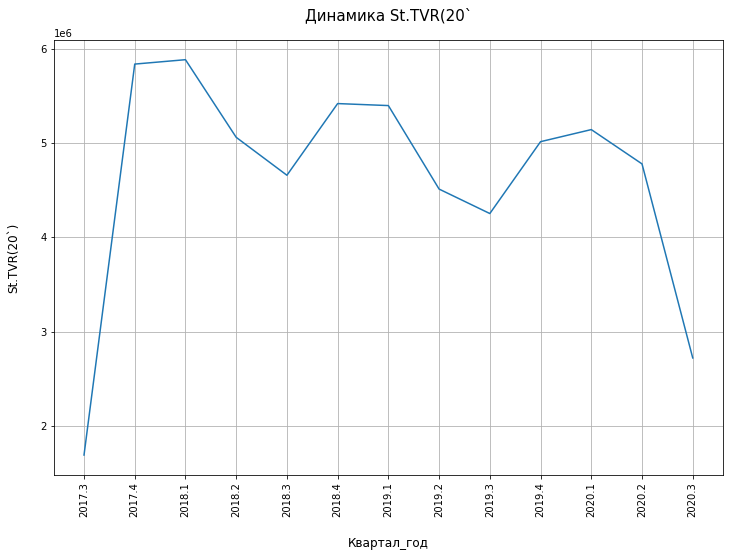

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


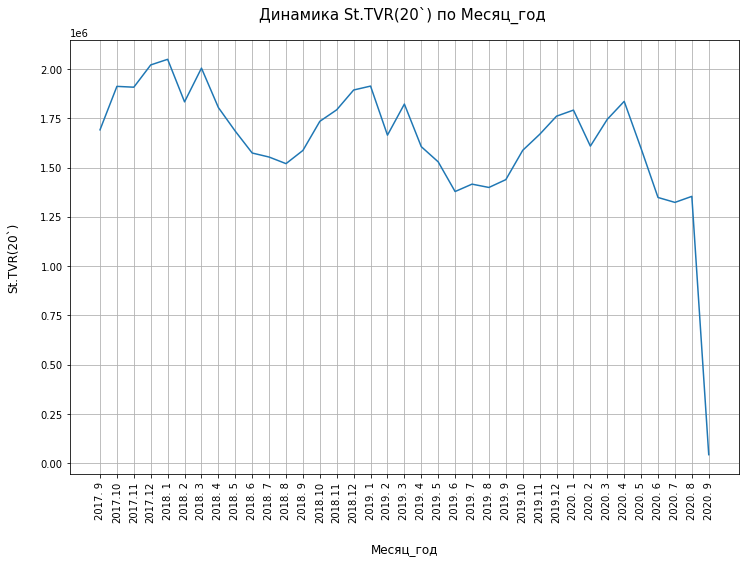

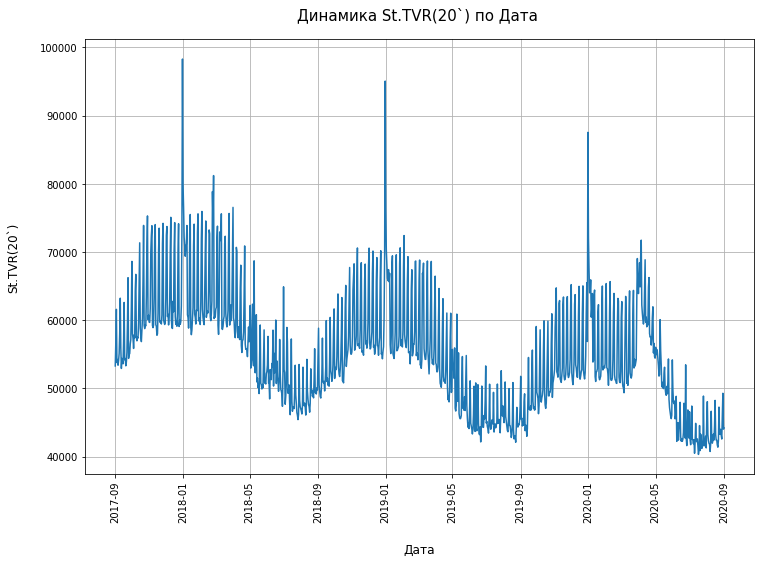

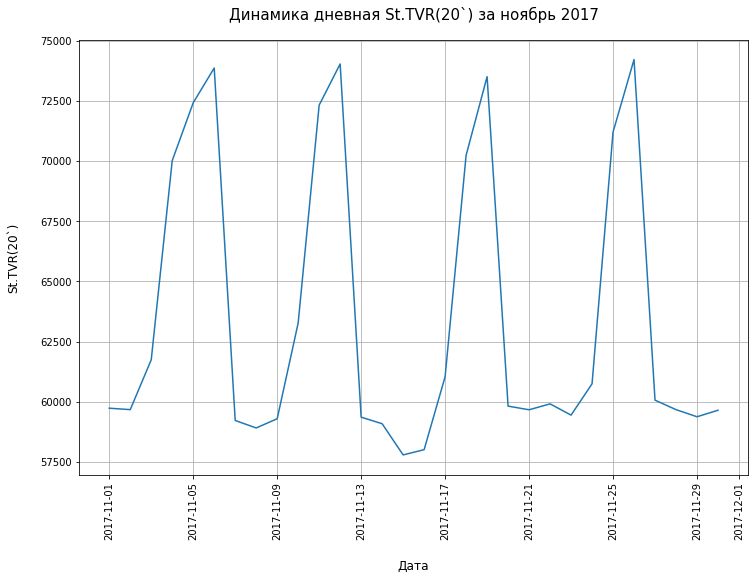

In [ ]:
plt.figure(figsize=(12,8))
plot_for_grouped_data(TVR_file,"St.TVR(20`)","Квартал_год","Динамика St.TVR(20`")
plt.show()

plt.figure(figsize=(12,8))
plot_for_grouped_data(TVR_file,"St.TVR(20`)","Месяц_год")
plt.show()

plt.figure(figsize=(12,8))
plot_for_grouped_data(TVR_file,"St.TVR(20`)","Дата")
plt.show()

plt.figure(figsize=(12,8))
plot_for_grouped_data(TVR_file[TVR_file["Месяц_год"] == "2017.11"],"St.TVR(20`)","Дата","Динамика дневная St.TVR(20`) за ноябрь 2017")
plt.show()


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

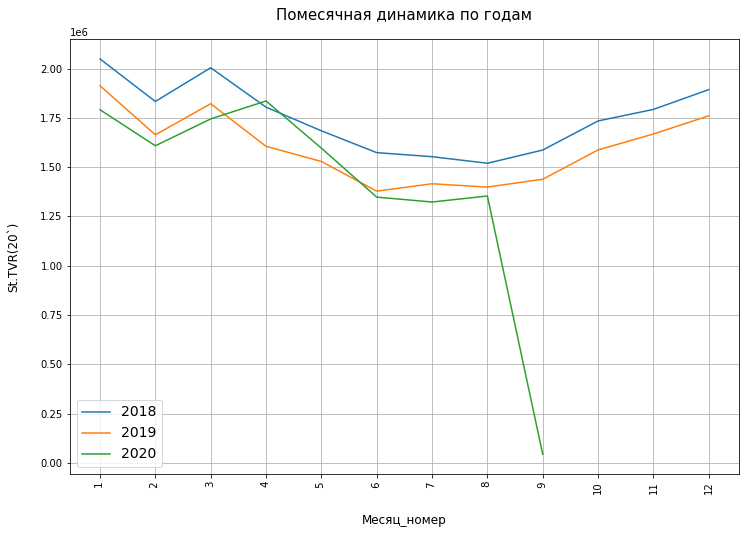

In [ ]:
plt.figure(figsize=(12,8))
year_list = [2018,2019,2020]
for i in year_list:
    plot_for_grouped_data(TVR_file[TVR_file['Год'] == i],"St.TVR(20`)","Месяц_номер", "Помесячная динамика по годам")
    plt.legend(year_list,fontsize=14)
plt.show()

По графикам ярко выражена годовая и недельная сезонность:

1. падение рейтингов во 2 и 3 (антилидер) квартале и потом рост в 4 и 1 (лидер) кварталах
2.в-целом пики телесмотрения наблюдаются в декабре-январе-марте
3.исходя из погодового графика наблюдается нисходящий тренд по общему 
телесмотрению
4.также ярко выражены пики в январе (январские праздники)
5.выражена сезонность внутри недель (выходные дни)
6.в 2020 году появился третий пик по втором квартале (из-за карантина) - мы видим резкий рост в апреле 2020 и более высокие показатели в мае, 
чем должны были быть исходя из обычной динамики. В июне тренд более-менее восстановился

Обязательно проверить качество прогнозных моделей в 20 году и возможно скорректировать модели 


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

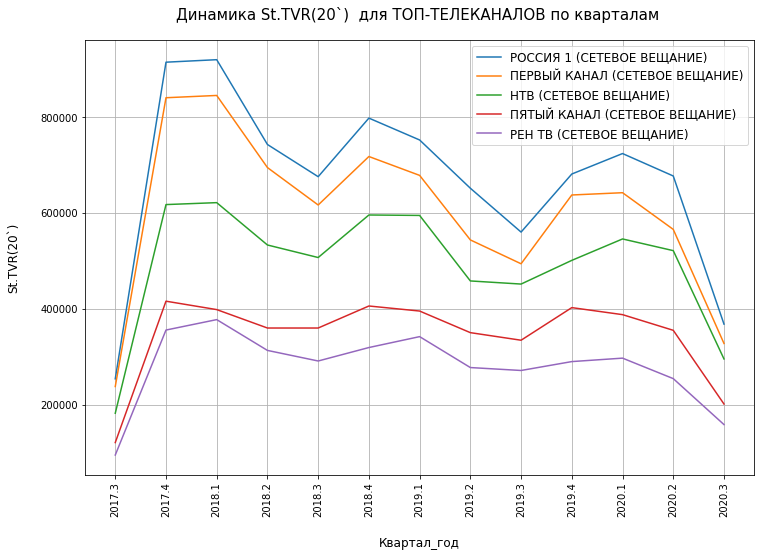

In [ ]:
plt.figure(figsize=(12,8))
list_channels = list(Channels_paretto_full.index[0:5])
TVR_file["Квартал_год"] = TVR_file["Квартал_год"].astype(str)
for i in list_channels:
    plot_for_grouped_data(TVR_file[TVR_file['Телекомпания_оригинала'] == i],"St.TVR(20`)","Квартал_год","Динамика St.TVR(20`)  для ТОП-ТЕЛЕКАНАЛОВ по кварталам ")
    plt.legend(list_channels,fontsize=12)
plt.show()

Выраженная сезонность, которую мы наблюдали на всем рынке, характерна также и для всех телеканалов. 

Соответственно, предположительно прогнозы поканальные можно строить на основе модели для всего рынка

# **Метрики**
Для оценки прогнозных моделей будем сравнивать их метрики.

Создадим функции для основных метрик MAPE и MSE

In [ ]:
def MSE(y_true, y_pred):
    return ((y_pred - y_true) ** 2).mean()


def MAPE(y_true, y_pred):
    return (np.abs(y_pred - y_true)/y_true).mean()

# **Построение динамических прогнозов**

### **Будем использовать Prophet, так как он подходит для построения временных рядов**

1. Построим изначальный прогноз на 180 дней, проанализируем полученные предварительные данные
2. Построим прогноз на основе 2-5 полугодия на 6 полугодие и найдем метрики для сравнения двух моделей

Для построения модели:
1. выделим данные c учетом обучающего периода
2. преобразуем  изначальную таблицу в фактическую, чтобы можно ее было сконтактировать с профетовским прогнозом
3. создадим таблицу для модели со столбцами ds и y и выбранными периодами для обучения
4. обучим модель
5. сделаем прогноз
6. сделаем общую таблицу с фактическими и прогнозными данными 
7. визуализируем данные и посчитаем метрики

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


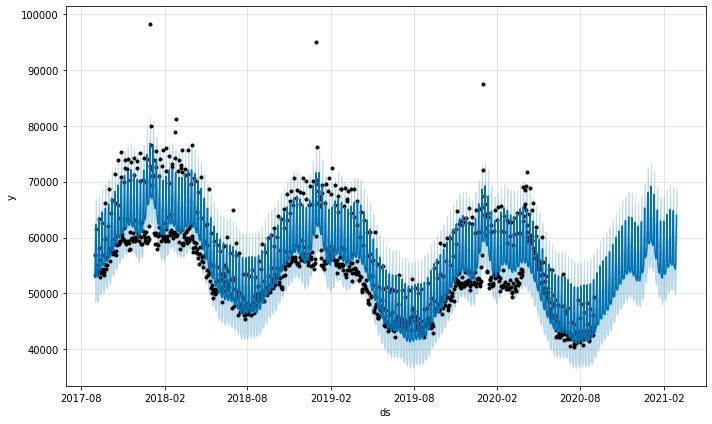

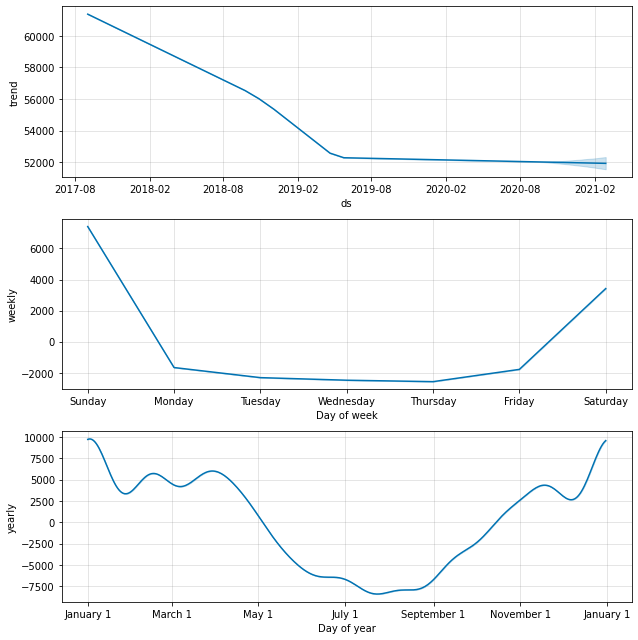

In [ ]:
df_initial = TVR_file.groupby("Дата")['St.TVR(20`)'].sum()
period = 180
prediction = None

df_fact = df_initial.to_frame().reset_index()
df_fact.rename(columns={"Дата":'ds', "St.TVR(20`)": 'y'}, inplace=True)

if prediction == None:
    df_for_prophet = df_initial.to_frame().reset_index()
    df_for_prophet.rename(columns={"Дата":'ds', "St.TVR(20`)": 'y'}, inplace=True)
else:
    df_for_prophet = df_initial[:-prediction].to_frame().reset_index()
    df_for_prophet.rename(columns={"Дата":'ds', "St.TVR(20`)": 'y'}, inplace=True)

m = Prophet()
m.fit(df_for_prophet)

future = m.make_future_dataframe(periods = period)
forecast = m.predict(future)

if prediction == None:
   prophet_fact_forecast = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df_for_prophet.set_index('ds'))
else:
   prophet_fact_forecast = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join( df_fact.set_index('ds')) 


fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)


y_pred_full = prophet_fact_forecast["yhat"].values
y_true_full = prophet_fact_forecast["y"].values
dates = prophet_fact_forecast.index
    


Первоначальные выводы по модели:
1. Модель довольно хорошо  определила сезонность
2. Модель показывает стагнацию рынка после падения  (скорее всего связано с "завышенными" данными в период карантина во 2 квартале 2020 года. Без него скорее всего было бы падение)
3. Есть выраженная годовая сезонность роста с осени, и падения весной
4. Есть выраженная недельная сезонность (пики в выходные дни)

Построенный прогноз визуально с не очень большим отклонением, несмотря на то, что прогнозировали "карантинный" период 

Для дальнейшей работы и валидации данных определим функцию для построения prophet модели (с учетом обучающей выборки):
1. В функцию для построения модели prophet сразу включим параметры holidays и hangepoint_prior_scale, которые планирую оптимизировать
2. Функция будет возвращать таблицу с прогнозируемыми данными и фактическими 

In [ ]:
def prophet_model_for_validation(df_initial, period, prediction = None, holidays = None, changepoint_prior_scale = 0.05):

    
    df_fact = df_initial.to_frame().reset_index()
    df_fact.rename(columns={"Дата":'ds', "St.TVR(20`)": 'y'}, inplace=True)
    
    if prediction == None:
        df_for_prophet = df_initial.to_frame().reset_index()
        df_for_prophet.rename(columns={"Дата":'ds', "St.TVR(20`)": 'y'}, inplace=True)
    else:
        df_for_prophet = df_initial[:-prediction].to_frame().reset_index()
        df_for_prophet.rename(columns={"Дата":'ds', "St.TVR(20`)": 'y'}, inplace=True)
    
    m = Prophet(holidays = holidays, changepoint_prior_scale = changepoint_prior_scale )
    m.fit(df_for_prophet)
    
    future = m.make_future_dataframe(periods=period )
    forecast = m.predict(future)
    
    if prediction == None:
       prophet_fact_forecast = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df_for_prophet.set_index('ds'))
    else:
       prophet_fact_forecast = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join( df_fact.set_index('ds')) 

    # fig1 = m.plot(forecast)
    # fig2 = m.plot_components(forecast)

    return prophet_fact_forecast



Для понимания точности модели, нужно найти метрики ошибок для нее, а также сравнить метрики других использованных моделей.
Я сравнивала модели prophet и линейную регрессию.
Построим БАЗОВУЮ модель, на которой будем сравнивать метрики.

Выбор данных для Базовой модели:

1. Так как у нас данные за 6 полугодий, то для получения метрик обучающая выборка для линейной регрессии будет 1-4 полугодие, а тестовая 2-5 полугодие.

2. К модели профет применим тестовую выборку (для нее нет отдельно обучающей и тестовой выборки)

2. Для базовой модели не будем использовать дополнительные критерии

    


**Базовая модель** (данные 2-6 полугодие, perdiction 180 дней (предсказываем последние 180 дней  - 6ое полугодие)

Выведем таблицу с факт (y) и прогнозными (yhat) данными
и визуализируем данные

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


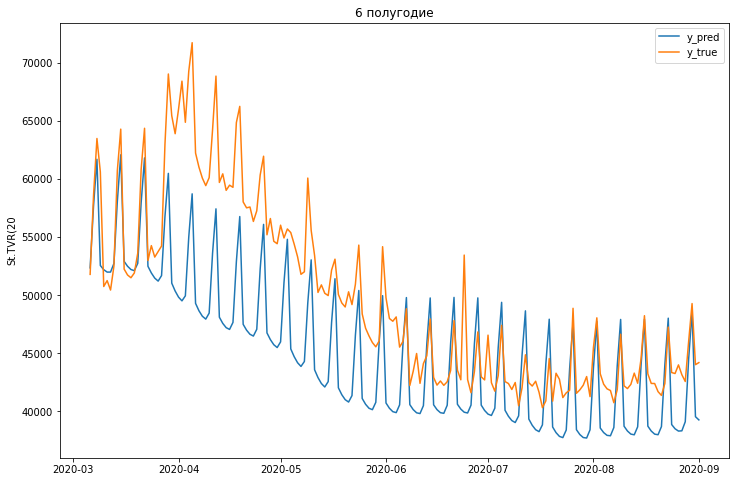

MSE:  43046713.746020526
MAPE:  0.0993741558118897


In [ ]:

df_initial = TVR_file.groupby("Дата")['St.TVR(20`)'].sum()[180:]
period = 180
prediction = 180


prophet_fact_forecast = prophet_model_for_validation(df_initial, period, prediction)

y_true = prophet_fact_forecast["y"].values[-180:]
y_pred = prophet_fact_forecast["yhat"].values[-180:]
dates = prophet_fact_forecast.index


plt.figure(figsize=(12,8))
plt.plot(dates[-180:],  y_pred, label = "y_pred")
plt.plot(dates[-180:], y_true, label = "y_true")
plt.ylabel("St.TVR(20")
plt.title("6 полугодие")
plt.legend()
plt.show()
print("MSE: ", MSE(y_true,y_pred ))
print("MAPE: ", MAPE(y_true,y_pred ))

В принципе, ошибка не очень большая, но видим, что в прогнозе на апрель - май,  хотя тенденции угаданы, но отклонения в среднем выше, чем по другим периодам (это связано с нестандартной тенденцией в карантин).

(Для интереса проверила ошибку при прогнозе 2-3-4 полугодия на 5 полугодие. Ошибка оказалась еще больше. За базовую модель будем считать изначальную)

Попробуем улучшить метрики базовой модели 

**Первый вариант оптимизации** - УДАЛЕНИЕ "ВЫБРОСОВ"

1.Удаление выбросов в январе. 
По графику мы видели, что есть 3 больших выброса в январе, выпадающих на новогодний праздник. И несколько других, поменьше

2.Построим модель без них.

3.Для этого построим таблицу с данными c самыми высокими "выбросами" ('St.TVR(20`)'), а потом в данных для построения модели исключим эти данные

In [ ]:

vibros = TVR_file.groupby("Дата")['St.TVR(20`)'].sum().sort_values(ascending = False)
vibros_list = vibros.head(10).index
 


Базовая модель без "выбросов"

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


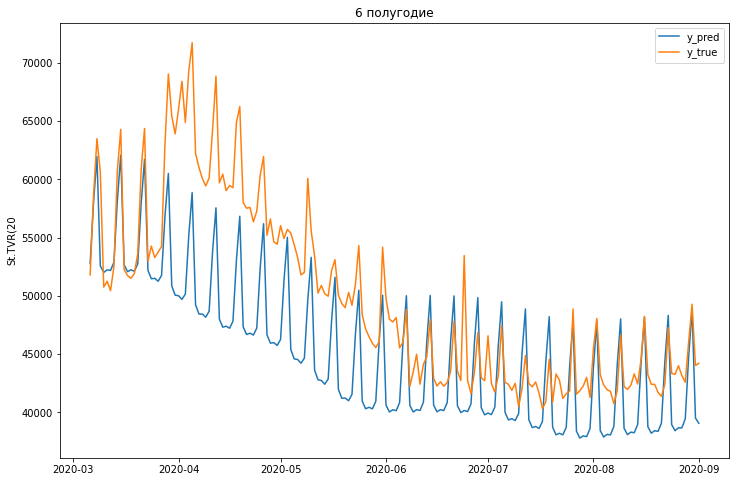

MSE:  42309275.521298416
MAPE:  0.09812893082121066


In [ ]:

df_initial = TVR_file.loc[~TVR_file["Дата"].isin(vibros_list)]
df_initial = df_initial.groupby("Дата")['St.TVR(20`)'].sum()[180:]
period = 180
prediction = 180


prophet_fact_forecast = prophet_model_for_validation(df_initial, period, prediction)


y_true = prophet_fact_forecast["y"].values[-180:]
y_pred = prophet_fact_forecast["yhat"].values[-180:]
dates = prophet_fact_forecast.index


plt.figure(figsize=(12,8))
plt.plot(dates[-180:],  y_pred, label = "y_pred")
plt.plot(dates[-180:], y_true, label = "y_true")
plt.ylabel("St.TVR(20")
plt.legend()
plt.title("6 полугодие")
plt.show()
print("MSE: ", MSE(y_true,y_pred ))
print("MAPE: ", MAPE(y_true,y_pred ))

Как мы видим, MAPE хоть незначительно, но улучшилась до 0.098 (с 0.099). MSE тоже уменьшилась. В окончательной модели будем использовать данную оптимизацию

**Второй вариант улучшений** - HOLIDAYS

1. Добавим праздники в модель
2. Создадим таблицу с праздниками. Так как в исходной таблице и праздники и выходные могут быть как просто "выходными", так и "праздниками",
я отбросила те, которые выпадают на субботу и воскресенье (они в любом случае включаются в недельную сезонность), и оставила только "внеплановые" выходные. Плюс добавила праздники на 2021
3. Приведем в формат для профет (ds и y) и получим 
список праздников holiday_dates

In [ ]:
holiday_dates = TVR_file[(TVR_file["День_тип"]=='Праздник')|(TVR_file["День_тип"]=='Выходной')]
holiday_dates = holiday_dates[(holiday_dates["День_недели"]!='Суббота') & (holiday_dates["День_недели"]!='Воскресенье')]
holiday_dates = holiday_dates.groupby("Дата")['St.TVR(20`)'].sum().to_frame().reset_index()
holiday_dates = holiday_dates.drop('St.TVR(20`)',axis = 1)

holiday_dates_2021 = pd.DataFrame (["2021-01-01","2021-01-02","2021-01-03","2021-01-04","2021-01-05","2021-01-06","2021-01-07","2021-01-08","2021-01-09","2021-01-10",],
                                   columns = ["Дата"])
pd.to_datetime(holiday_dates_2021['Дата'])


holiday_dates.append(holiday_dates_2021,ignore_index=True)


holiday_dates["holiday"] = "holiday"
holiday_dates.columns=["ds","holiday"]


Базовая модель с выходными

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


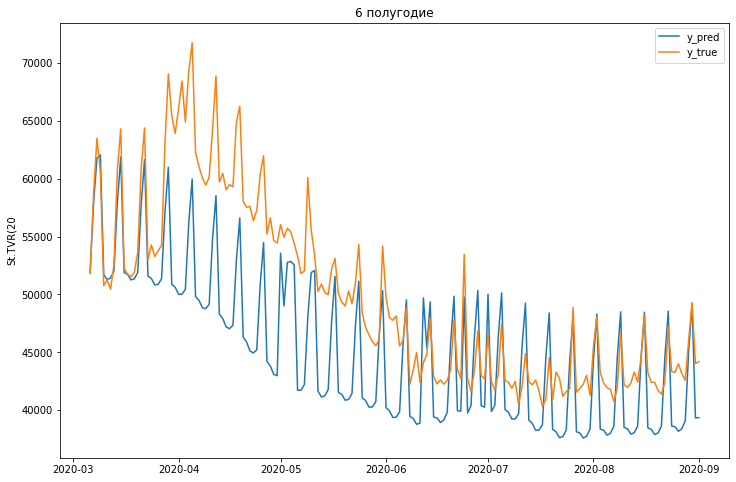

MSE:  42852713.31104639
MAPE:  0.09959407190860933


In [ ]:
df_initial = TVR_file.groupby("Дата")['St.TVR(20`)'].sum()[180:]
period = 180
prediction = 180 
holidays = holiday_dates


prophet_fact_forecast = prophet_model_for_validation(df_initial, period, prediction, holidays)

y_true = prophet_fact_forecast["y"].values[-180:]
y_pred = prophet_fact_forecast["yhat"].values[-180:]
dates = prophet_fact_forecast.index

plt.figure(figsize=(12,8))
plt.plot(dates[-180:],  y_pred, label = "y_pred")
plt.plot(dates[-180:], y_true, label = "y_true")
plt.ylabel("St.TVR(20")
plt.title("6 полугодие")
plt.legend()
plt.show()
print("MSE: ", MSE(y_true,y_pred ))
print("MAPE: ", MAPE(y_true,y_pred ))

Как мы видим, MAPE немного ухудшлось, а MSE улучшилось. Сомнительная оптимизация. Сравним влияние на финальной модели

**Третий вариант улучшений** - changepoint_prior_scale (сглаженность графика)


Базовая модель с changepoint_prior_scale

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


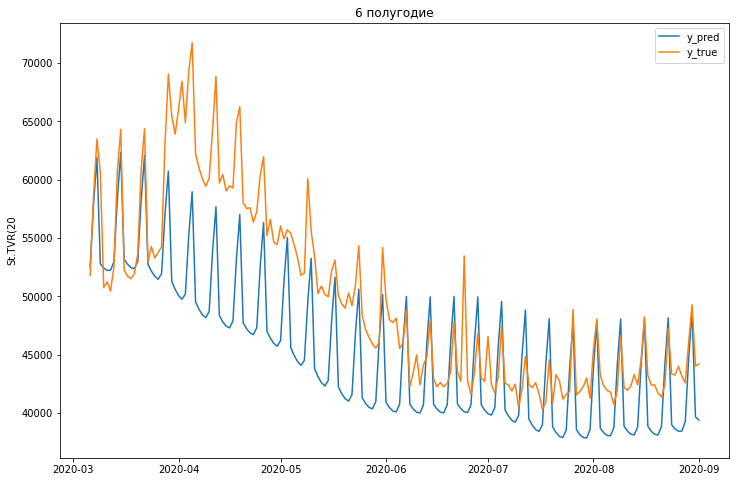

MSE:  41101010.60375025
MAPE:  0.09673544680873969


In [ ]:
df_initial = TVR_file.groupby("Дата")['St.TVR(20`)'].sum()[180:]
period = 180
prediction = 180 
changepoint_prior_scale = 0.03


prophet_fact_forecast = prophet_model_for_validation(df_initial, period, prediction, changepoint_prior_scale = changepoint_prior_scale )


y_true = prophet_fact_forecast["y"].values[-180:]
y_pred = prophet_fact_forecast["yhat"].values[-180:]
dates = prophet_fact_forecast.index

plt.figure(figsize=(12,8))
plt.plot(dates[-180:],  y_pred, label = "y_pred")
plt.plot(dates[-180:], y_true, label = "y_true")
plt.ylabel("St.TVR(20")
plt.legend()
plt.title("6 полугодие")
plt.show()
print("MSE: ", MSE(y_true,y_pred ))
print("MAPE: ", MAPE(y_true,y_pred ))

Методом перебора подобрала такое значение changepoint.prior.scale (0.03), при котором уменьшились ошибки. Будем использовать в модели

Итого для финальной обучающей модели мы к базовой модели применим:

1. удаление выбросов
2. changepoint.prior.scale (0.03)
3. добавление праздников (под вопросом)


**Финальная обучающая модель**

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


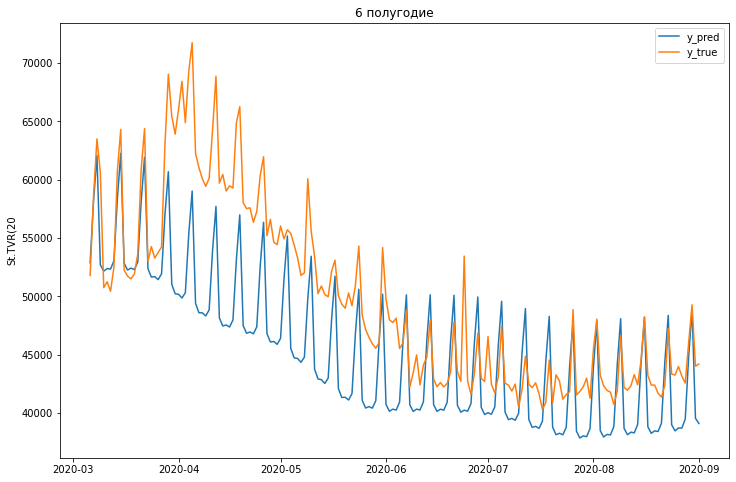

MSE:  41065289.98589166
MAPE:  0.09655619364641017


In [ ]:
df_initial = TVR_file.loc[~TVR_file["Дата"].isin(vibros_list)]
df_initial = df_initial.groupby("Дата")['St.TVR(20`)'].sum()[180:]
period = 180
prediction = 180 
changepoint_prior_scale = 0.03
holidays = holiday_dates


prophet_fact_forecast = prophet_model_for_validation(df_initial, period, prediction, changepoint_prior_scale = changepoint_prior_scale )


y_true = prophet_fact_forecast["y"].values[-180:]
y_pred = prophet_fact_forecast["yhat"].values[-180:]
dates = prophet_fact_forecast.index

plt.figure(figsize=(12,8))
plt.plot(dates[-180:],  y_pred, label = "y_pred")
plt.plot(dates[-180:], y_true, label = "y_true")
plt.ylabel("St.TVR(20")
plt.legend()
plt.title("6 полугодие")
plt.show()
print("MSE: ", MSE(y_true,y_pred ))
print("MAPE: ", MAPE(y_true,y_pred ))

При учете всех трех изменений у нас высокая ошибка. Поэтому я по очереди перебрала "улучшения", и в результате использовала только два 
(без holidays, которое изначально было под некоторым вопросом)

In [ ]:
# Выведем финальные ошибки Prophet:
y_true = prophet_fact_forecast["y"].values[-180:]
y_pred = prophet_fact_forecast["yhat"].values[-180:]

print("MSE : ", MSE(y_true,y_pred ))
print("MAPE : ", MAPE(y_true,y_pred ))

# print("MSE по полугодиям: ", MSE(sum(y_true),sum(y_pred) ))
# print("MAPE по полугодиям: ", MAPE(sum(y_true),sum(y_pred) ))


MSE :  41065289.98589166
MAPE :  0.09655619364641017


# **Модель линейной регрессии.**

Будем строить регрессионную модель.

Для сравнения с метриками модели Prophet, для тестовой базы возьмем идентичный период (т.е. модель на основе 2-5 полугодия  - прогноз на 6 полугодие) + ту же базу (без некоторых выбросов)

Таким образом, будет делать по следующей схеме:

1. Обучающую модель будем строить на основе 1-4 полугодий на 5 полугодие.
2. Далее строим модель на основе 2-5 полугодий на 6 полугодия с коэффициентами из обучающей модели 
3. Рассчитываем метрики на основе 6 полугодия (true и pred)
4. Сравниваем метрики с метриками, полученными в профете


In [ ]:
df_initial = TVR_file.loc[~TVR_file["Дата"].isin(vibros_list)]
# данные за 1-4 полугодие
df_initial_x_train = df_initial.groupby("Дата")['St.TVR(20`)'].sum()[:720]
#данные за 5 полугодие
df_initial_y_train = df_initial.groupby("Дата")['St.TVR(20`)'].sum()[720:900]


X_train = df_initial_x_train.values.reshape(4,180).T
#df_initial_pred.shape
#df_initial_train.shape
y_train = df_initial_y_train.values.reshape(-1,1)



In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.coef_


array([[ 0.19461873, -0.28079199, -0.03404713, -0.22380855]])

Построим модель с найденными коэффициентами на тестовой выборке (за 2-5 полугодие на 6 полугодие и сравним с фактом)

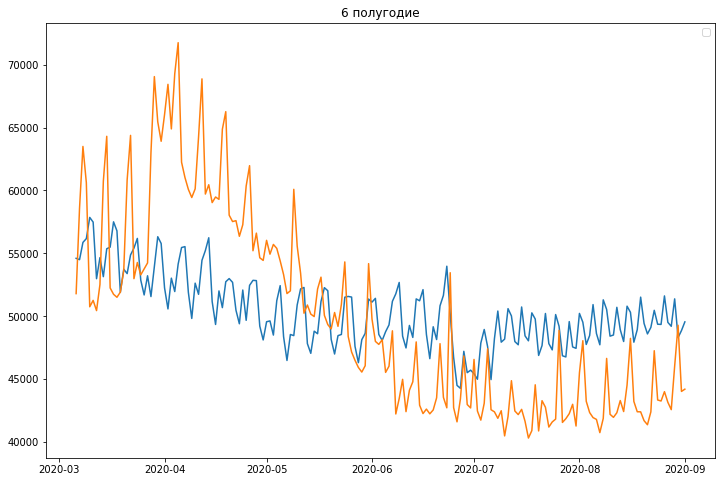

MSE:  69858469.98480219
MAPE:  0.14019886436288917


In [ ]:
df_initial = TVR_file.loc[~TVR_file["Дата"].isin(vibros_list)]
# данные за 2-5 полугодие
df_initial_x_test = df_initial.groupby("Дата")['St.TVR(20`)'].sum()[-900:-180]
#данные за 6 полугодие
df_initial_y_test_fact = df_initial.groupby("Дата")['St.TVR(20`)'].sum()[-180:]

X_test = df_initial_x_test.values.reshape(4,180).T
#y_train = df_initial_train_pred.values.reshape(-1,1)
y_pred = lr.predict(X_test)


y_true = df_initial_y_test_fact.values
y_pred = y_pred 
dates = df_initial_y_test_fact.index

plt.figure(figsize=(12,8))
plt.plot(dates,  y_pred)
plt.plot(dates, y_true)
plt.title("6 полугодие")
plt.legend()
plt.show()
print("MSE: ", MSE(y_true,y_pred ))
print("MAPE: ", MAPE(y_true,y_pred ))


Как мы видим, модель намного хуже отработала, чем prophet. Визуально больше отклонений, а также выше и MSE и MAPE



**Первый вариант оптимизации** - Логарифмирование

Попробуем применить логарифмирование, так как разброс очень велик.

In [ ]:
print("min",df_initial_x_train.min())
print("max",df_initial_x_train.max())


min 42107.119999999944
max 75658.41000000003


Базовая модель с логарифмированием

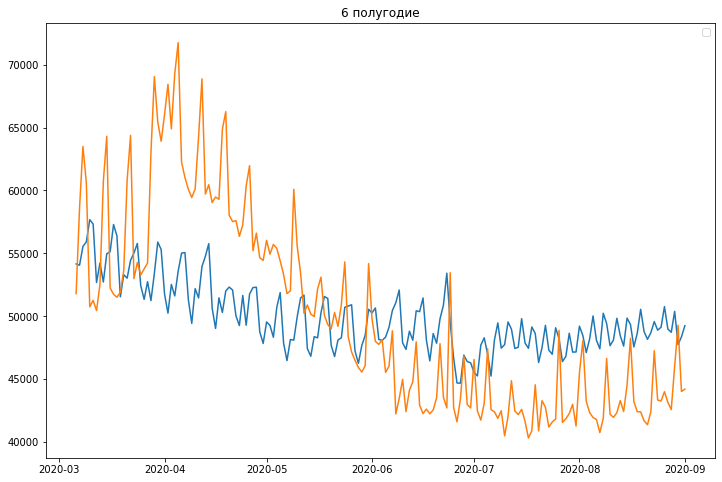

MSE:  69128769.32518084
MAPE:  0.1371629783536349


In [ ]:
# Данные без выбросов
df_initial = TVR_file.loc[~TVR_file["Дата"].isin(vibros_list)]
# данные за 1-4 полугодие
df_initial_x_train = df_initial.groupby("Дата")['St.TVR(20`)'].sum()[:720]
#данные за 5 полугодие
df_initial_y_train = df_initial.groupby("Дата")['St.TVR(20`)'].sum()[720:900]

X_train = df_initial_x_train.values.reshape(4,180).T
y_train = df_initial_y_train.values.reshape(-1,1)
X_train_log = np.log(X_train)
y_train_log = np.log(y_train)

lr = LinearRegression()
lr.fit(X_train_log, y_train_log)
lr.coef_

df_initial = TVR_file.loc[~TVR_file["Дата"].isin(vibros_list)]
# данные за 2-5 полугодие
df_initial_x_test = df_initial.groupby("Дата")['St.TVR(20`)'].sum()[-900:-180]
#данные за 6 полугодие
df_initial_y_test_fact = df_initial.groupby("Дата")['St.TVR(20`)'].sum()[-180:]

X_test = df_initial_x_test.values.reshape(4,180).T
X_test_log = np.log(X_test)
y_pred_log = lr.predict(X_test_log)

# Перед оценкой качества нужно экспонировать значения 
y_pred_no_log =np.exp(y_pred_log)
y_true = df_initial_y_test_fact.values
y_pred = y_pred_no_log 
dates = df_initial_y_test_fact.index


plt.figure(figsize=(12,8))
plt.plot(dates,  y_pred)
plt.plot(dates, y_true)
plt.legend()
plt.title("6 полугодие")
plt.show()
print("MSE: ", MSE(y_true,y_pred ))
print("MAPE: ", MAPE(y_true,y_pred ))


Ошибка хоть немного улучшилась, но все равно остается высокой, особенно по сравнению с моделью prophet


# Для прогнозирования общих рейтингов и рейтингов телеканала будем использовать prophet

# **Поканальный прогноз на 2 года**

In [ ]:
list_channels = list(TVR_file_channels_share.index[0:2])


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



 для канала РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ)




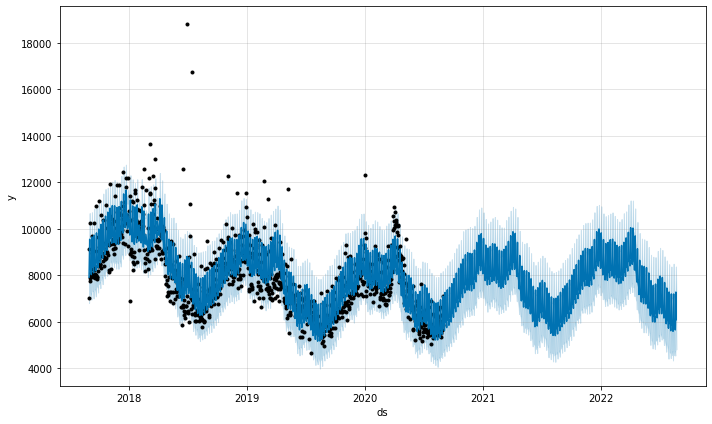

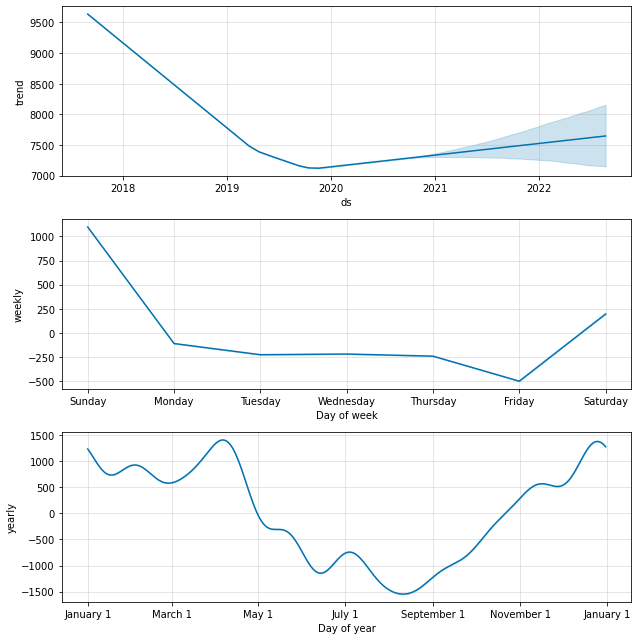

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



 для канала ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ)




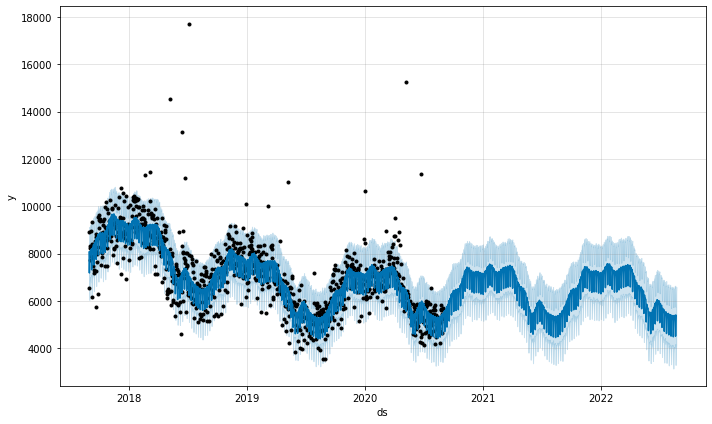

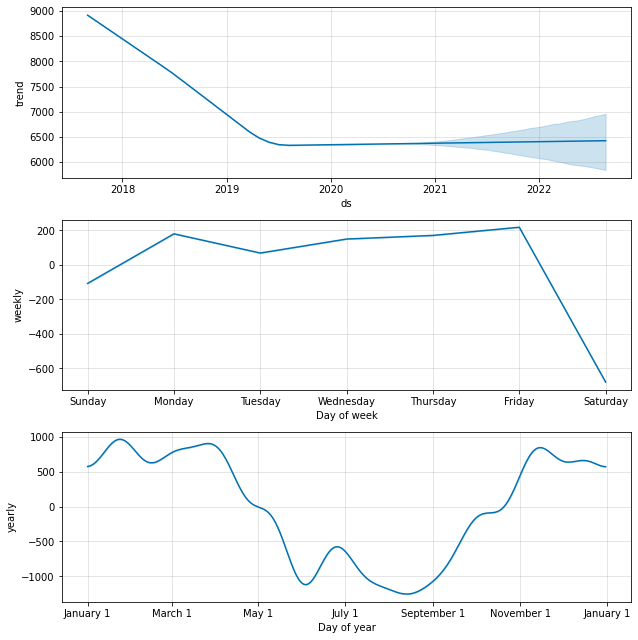

In [ ]:
for i in list_channels:
    df_initial = TVR_file.loc[~TVR_file["Дата"].isin(vibros_list)]
    df_initial = df_initial[df_initial['Телекомпания_оригинала'] == i].groupby("Дата")['St.TVR(20`)'].sum()
    
    df_for_prophet = df_initial.to_frame().reset_index()
    df_for_prophet.rename(columns={"Дата":'ds', "St.TVR(20`)": 'y'}, inplace=True)

    period = 720
    changepoint_prior_scale = 0.03
    
    m = Prophet(changepoint_prior_scale = 0.03)
    m.fit(df_for_prophet)

    future = m.make_future_dataframe(periods = period)
    forecast = m.predict(future)

    print("\n","для канала {}".format(i))
    print("\n")
    fig1 = m.plot(forecast)
    fig2 = m.plot_components(forecast)
    plt.show()
    


Для 2 летнего поканального прогноза, ошибка визуально получились выше.

Скорее всего, нужно оптимизировать модели для отдельного телеканала или делать меньший период прогнозирования (проверила, что при уменьшении периода, визуально ошибка также уменьшается)

Также интересно сравнить сезонности по каналам. Они отличаются в зависимости от каналов. Например, для России рейтинги в выходные выше, а для Первого канала в субботу наоборот рейтинги падают, а в остальные дни довольно ровные.


# **Взаимосвязь рейтингов и различных факторов**

**Корреляционная тепловая матрица.**

Для построения переведем категориалные признаки в числовые

In [ ]:

list_program = TVR_file["Программа_жанр_"].unique()
dict_program = dict(zip(list_program, np.arange(1,len(list_program)+1)))
list_weekday = TVR_file["День_недели"].unique()
dict_weekday = dict(zip(list_weekday, np.arange(1,len(list_weekday)+1)))
list_channels = TVR_file['Телекомпания_оригинала'].unique()
dict_channels = dict(zip(list_channels, np.arange(1,len(list_channels)+1)))

TVR_file["Телеканалы_номер"] = TVR_file['Телекомпания_оригинала'].apply(lambda str:dict_channels [str] )
TVR_file["День_недели_номер"] = TVR_file["День_недели"].apply(lambda str:dict_weekday[str] )
TVR_file["Программа_жанр_номер"] = TVR_file["Программа_жанр_"].apply(lambda str:dict_program[str] )

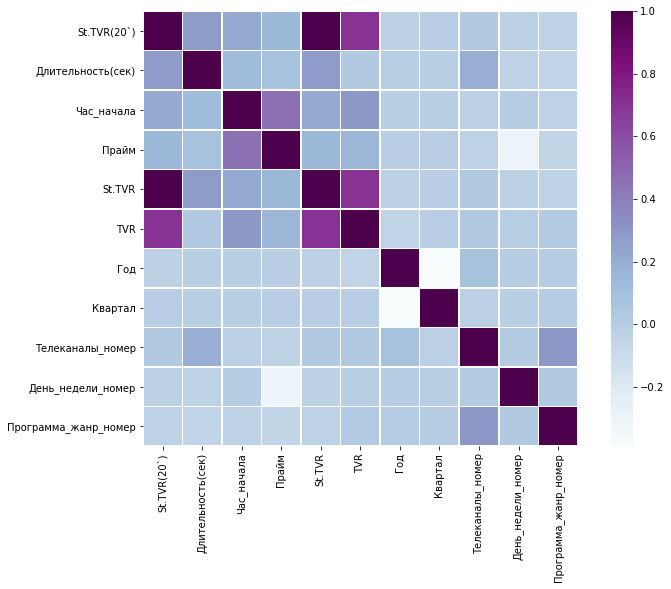

In [ ]:
corr_all = TVR_file.corr()

fig, ax0 = plt.subplots(figsize = (12, 8))
sns.heatmap(corr_all,
            square = True, linewidths = .5, ax = ax0,cmap = "BuPu")    
plt.show()


По этим данным, TVR сильнее всего коррелирует с ST TVR, длительностью (что логично).

По графику также есть связь (не сильно выраженная) с часом начала, праймом и телеканалом.
Но данная модель не очень корректная, так как плохо учитывает категориальные признаки.

Проверим взаимосвязь на отдельных графиках, а также на множественной регрессионной модели.

# **Взаимосвязь признаков и рейтингов**

Рассмотрим основные факторы, которые коррелируют с рейтингами.
Анализировать будем показатель TVR (средний рейтинг события), а не st TVR, чтобы нивелировать различие в длительности программ. 
Если какие-то факторы взаимосвязаны с TVR, то значит взаимосвязаны и с st.TVR  (st.TVR=TVR*длительность)



In [ ]:
def bar_for_grouped_data(df,ylabel,xgrouped,title = ""):
    plt.figure(figsize=(12,8))
    df.plot(kind = "bar",width = 0.35)
    if title == "":
         plt.title("Динамика {} по {} ".format(ylabel,xgrouped),fontweight =20, fontsize=15, pad = 20)
    else:
         plt.title(title,fontweight =20, fontsize=15, pad = 20)
    plt.grid(axis = "y")
    plt.xlabel(xgrouped,fontsize=12,labelpad=20)
    plt.ylabel(ylabel,fontsize=12,labelpad=20)
    plt.xticks(rotation = 90)

**прайм-непрайм и рейтинги**

<Figure size 864x576 with 0 Axes>

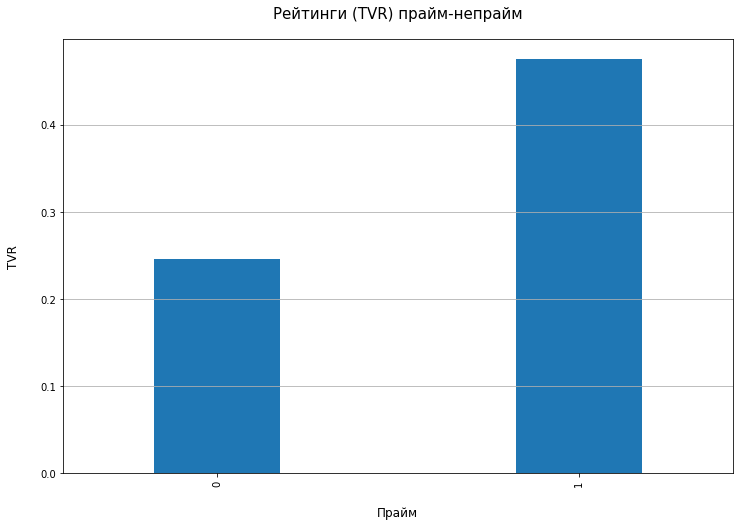

In [ ]:
plt.figure(figsize=(12,8))
df =(TVR_file.groupby(["Прайм"])["St.TVR"].sum()/TVR_file.groupby(["Прайм"])["Длительность(сек)"].sum())
bar_for_grouped_data(df,"TVR","Прайм","Рейтинги (TVR) прайм-непрайм" )


Средние рейтинги в прайм ожидаемо выше непраймовых

**время выхода программы**

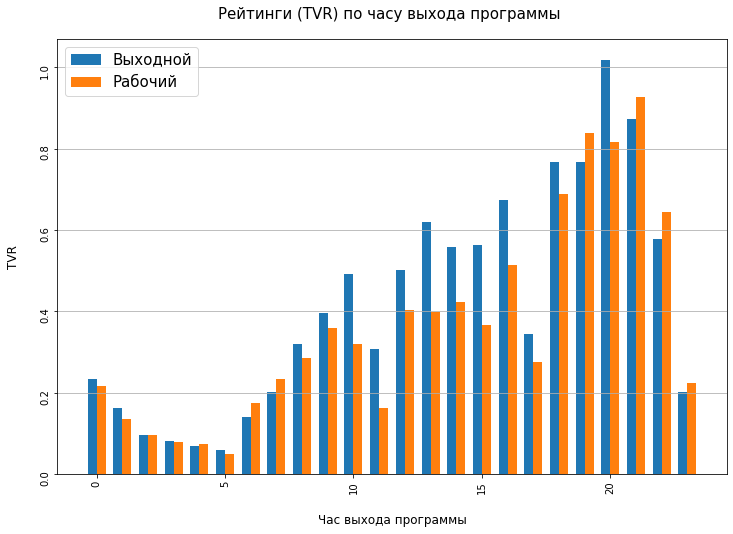

In [ ]:
fig,ax = plt.subplots(figsize=(12, 8))
width = 0.35
TVR_file["Час_начала1"] = TVR_file["Час_начала"].astype(str)
x = np.arange(len(TVR_file["Час_начала"].unique()-1))
vih = ax.bar(x - width/2, (TVR_file[TVR_file["День_тип"] == "Выходной"].groupby(["Час_начала"])["St.TVR"].sum()/TVR_file[TVR_file["День_тип"] == "Выходной"].groupby(["Час_начала"])["Длительность(сек)"].sum()).values, width, label='Выходной')
budni = ax.bar(x + width/2, (TVR_file[TVR_file["День_тип"] == "Рабочий"].groupby(["Час_начала"])["St.TVR"].sum()/TVR_file[TVR_file["День_тип"] == "Рабочий"].groupby(["Час_начала"])["Длительность(сек)"].sum()).values, width, label='Рабочий')
ax.set_title("Рейтинги (TVR) по часу выхода программы ",fontweight =20, fontsize=15, pad = 20)
ax.grid(axis = 'y')
ax.set_xlabel("Час выхода программы",fontsize=12,labelpad=20)
ax.set_ylabel("TVR",fontsize=12,labelpad=20)
ax.tick_params(labelrotation = 90)
ax.legend(loc = 2, fontsize = 15)
plt.show()


Как мы видим, рейтинги различается в зависимости от времени начала передачи
Общая динамика почасам в целом похожа в  будний-выходной, но в выходной ожидаемо больше рейтинги в дневное время.
Ожидаемо пиковое время 18-21. При этом "провалы" в 11,17 и утренние часы.



**Тип программы**

<Figure size 864x576 with 0 Axes>

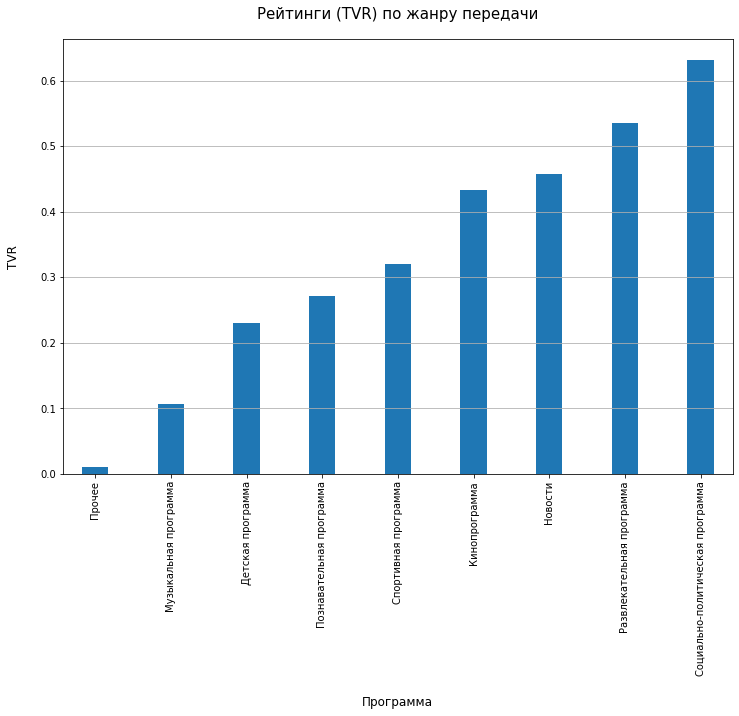

In [ ]:

plt.figure(figsize=(12,8))
df =(TVR_file.groupby(['Программа_жанр_'])["St.TVR"].sum()/TVR_file.groupby(['Программа_жанр_'])["Длительность(сек)"].sum())
df = df.sort_values()
bar_for_grouped_data(df,"TVR","Программа","Рейтинги (TVR) по жанру передачи")
plt.show()

Как мы видим, средний рейтинг зависитот жанра передач. Соц-полит передач и развлекательных передач является самым высоким.

**День недели**

<Figure size 864x576 with 0 Axes>

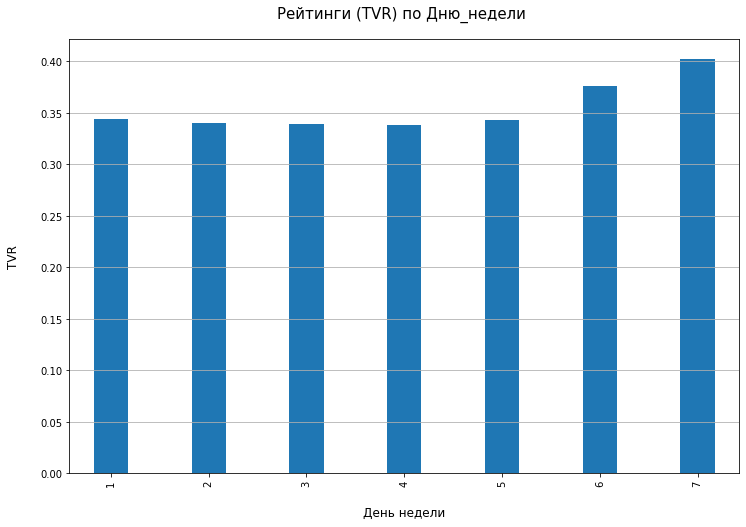

In [ ]:


# Переведем дни недели в цифры, чтобы на графики можно было отобразить по порядку
dict_week_day = {'Воскресенье': 7,
 'Вторник': 2,
 'Понедельник': 1,
 'Пятница': 5,
 'Среда': 3,
 'Суббота': 6,
 'Четверг': 4}
df=(TVR_file.groupby(['День_недели'])["St.TVR"].sum()/TVR_file.groupby(['День_недели'])["Длительность(сек)"].sum())
df = df.to_frame("TVR").reset_index()
df["День_недели_номер"] = df["День_недели"].apply(lambda x:dict_week_day[x])
df = df.sort_values("День_недели_номер")
df = df.set_index("День_недели_номер")
df = df.groupby("День_недели_номер")["TVR"].sum()
df

plt.figure(figsize=(12,8))
bar_for_grouped_data(df,"TVR","День недели","Рейтинги (TVR) по Дню_недели ")
plt.show()

В среднем средние рейтинги не сильно отличаются в будни от дня недели. 
Лидерами ожидаемо являются воскресенье и суббота. 
Проверим обобщенные данные на типе дня (рабочий-выходной)

**Тип дня**

<Figure size 864x576 with 0 Axes>

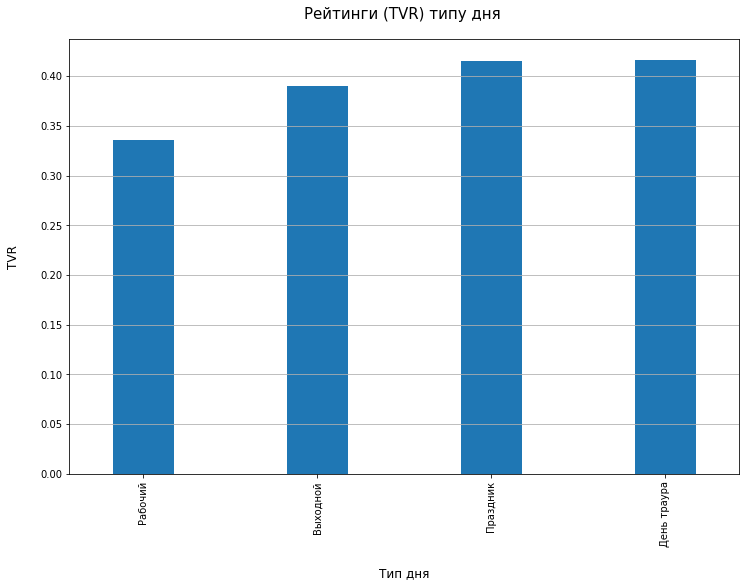

In [ ]:
plt.figure(figsize=(12,8))
df =(TVR_file.groupby(['День_тип'])["St.TVR"].sum()/TVR_file.groupby(['День_тип'])["Длительность(сек)"].sum())
df = df.sort_values()
bar_for_grouped_data(df,"TVR","Тип дня","Рейтинги (TVR) типу дня ")
plt.show()

Ср.рейтинги максимальны в праздники, потом в выходные дни, далее в рабочие. Что в общем логично.

Удивили "дни траура". Сделала проверку. 

Статистика по дню траура некорректна, так как обычно программы запрещены - поэтому есть небольшое количество выходов, по которым некорректно сравнивать TVR.
TVR_file[TVR_file['День_тип'] == "День траура"].shape

**Телеканал**

<Figure size 864x576 with 0 Axes>

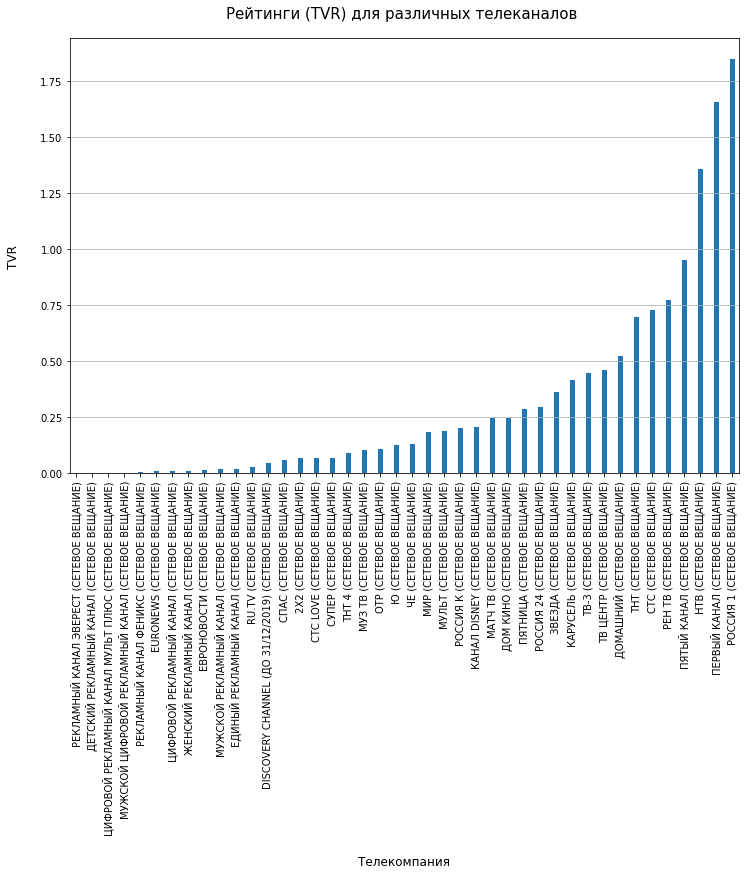

In [ ]:
plt.figure(figsize=(12,8))
df =(TVR_file.groupby(['Телекомпания'])["St.TVR"].sum()/TVR_file.groupby(['Телекомпания'])["Длительность(сек)"].sum())
df = df.sort_values()
bar_for_grouped_data(df,"TVR","Телекомпания","Рейтинги (TVR) для различных телеканалов ")
plt.show()

По графику средние рейтинги по каналам сильно отличаются

## **Регрессионная модель CATBOOST**

Построим модель регрессии 

1. для определения, сколько рейтингов может принести передача исходя из ее характеристик.
2. для определения наиболее значимых факторов (построение feature importance)

Для модели будем использовать CATBOOST, так как он хорошо работает на категориальных признаках.
Для определения значимых факторов и визуализации будем использовать Shap

In [ ]:
pip install catboost

In [ ]:

from catboost import  Pool, CatBoostRegressor

## CatBoostRegressor

Построим регрессионную модель

При построении модели:

1. Выделила тестовую и обучающую базы
2. Определила категориальные признаки
3. Построила модель на обучающей выборке
4. Посчитала ошибку на тестовой выборке

Оптимизация:

Для оптимизации ошибки (MSE):
1. Удалила "выбросы" (посчитала квантиль 10% 90% и взяла только данные, которые находятся между 10% самысми высокими и самыми низкими значениями)
2. Методом перебора и расчета ошибки подобрала количество итераций, learning rate и depth для уменьшения ошибки


In [ ]:
vibros_TVR = TVR_file['TVR'].sort_values(ascending = False)
vibros_TVR_90 = TVR_file['TVR'].quantile(0.9)
vibros_TVR_10 = TVR_file['TVR'].quantile(0.1)
TVR_file_vibros_10_90 = TVR_file[(TVR_file['TVR']<= vibros_TVR_90) & (TVR_file['TVR']>= vibros_TVR_10)] 


# Базовая модель

In [ ]:

TVR_file_CB = TVR_file_vibros_10_90 

X = TVR_file_CB.loc[:,["Длительность(сек)", 'Программа_жанр_','Месяц','Телекомпания_оригинала','День_недели','Час_начала','День_тип']]
#X = TVR_file_CB.loc[:,["Длительность(сек)", 'Час_начала',"Телеканалы_номер"]]
y = TVR_file_CB['TVR']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 123)

categorical_features_indices = np.where(X.dtypes != np.int)[0]
categorical_features_indices = list(categorical_features_indices)
train_dataset = Pool(data=X_train,
                     label=y_train,
                     cat_features=categorical_features_indices)

eval_dataset = Pool(data=X_test,
                    label=y_test,
                    cat_features=categorical_features_indices)

catmodel=CatBoostRegressor(iterations=100, depth=10, learning_rate=0.7)
catmodel.fit(train_dataset,  eval_set=eval_dataset)

y_true = y_test.values
y_pred = catmodel.predict(eval_dataset) 

print("MSE: ", MSE(y_true,y_pred ))
print("MAPE: ", MAPE(y_true,y_pred))


0:	learn: 0.1215282	test: 0.1214261	best: 0.1214261 (0)	total: 616ms	remaining: 1m
1:	learn: 0.1080839	test: 0.1078328	best: 0.1078328 (1)	total: 1.1s	remaining: 54.1s
2:	learn: 0.1028675	test: 0.1025806	best: 0.1025806 (2)	total: 1.7s	remaining: 55s
3:	learn: 0.0954381	test: 0.0950386	best: 0.0950386 (3)	total: 2.21s	remaining: 52.9s
4:	learn: 0.0928994	test: 0.0923287	best: 0.0923287 (4)	total: 2.76s	remaining: 52.5s
5:	learn: 0.0908838	test: 0.0903564	best: 0.0903564 (5)	total: 3.28s	remaining: 51.4s
6:	learn: 0.0895351	test: 0.0889959	best: 0.0889959 (6)	total: 3.78s	remaining: 50.3s
7:	learn: 0.0886059	test: 0.0880249	best: 0.0880249 (7)	total: 4.29s	remaining: 49.3s
8:	learn: 0.0874151	test: 0.0868674	best: 0.0868674 (8)	total: 4.81s	remaining: 48.6s
9:	learn: 0.0866713	test: 0.0861298	best: 0.0861298 (9)	total: 5.3s	remaining: 47.7s
10:	learn: 0.0857932	test: 0.0853479	best: 0.0853479 (10)	total: 5.8s	remaining: 47s
11:	learn: 0.0850462	test: 0.0846334	best: 0.0846334 (11)	total

В целом, по MSE модель неплохо оптимизировала данные, но MAPE остается высоким.
Проверим на графике, насколько сильно визуально отличаются прогнозные и фактические ошибки.

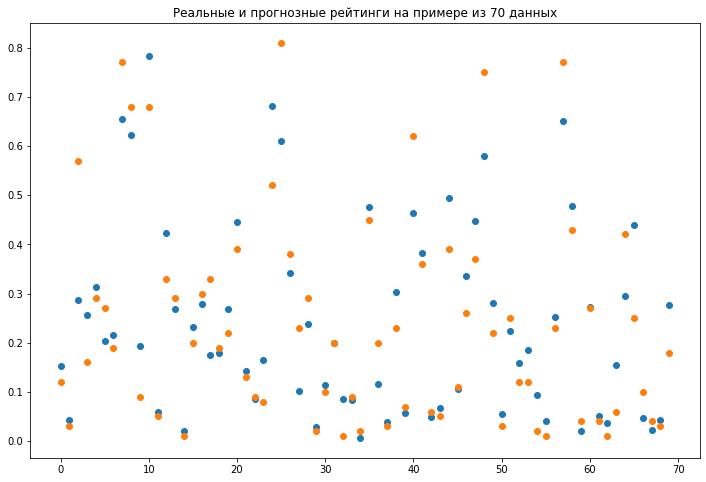

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(np.arange(0,70),y_pred[:70], label ="y_pred")
plt.scatter(np.arange(0,70),y_true[:70],label = "y_true")
plt.title("Реальные и прогнозные рейтинги на примере из 70 данных")
plt.show()


В-целом, визуально ошибка не очень значительна. Попробуем определить, почему такая высокая MAPE. Для этого рассмотрим MAPE пообъектно и построим график взаимосвязи MAPE и y_true

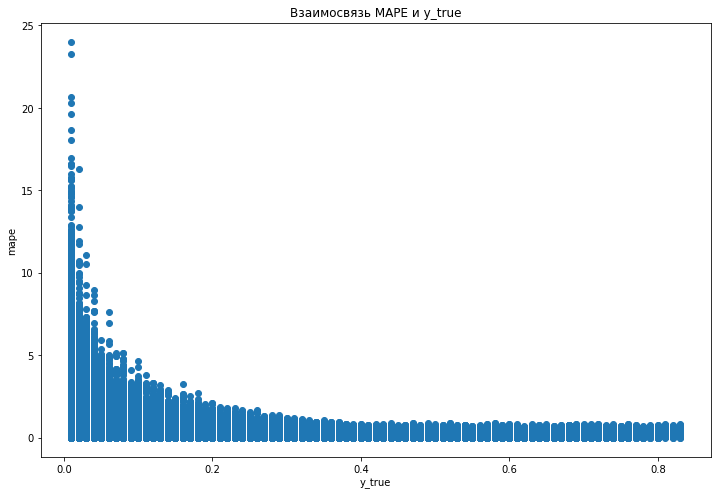

In [ ]:
mape_list_sorted = []
y_true_list_sorted = []
dict_mape = {}
for i in range(0, len(y_true[:])):
    dict_mape[i] = MAPE(y_true[i],y_pred[i]), y_true[i]
#print(dict_mape)
for key, val in sorted(dict_mape.items(), key= lambda x: x[1], reverse = False):
  mape_list_sorted.append(val[0])
  y_true_list_sorted.append(val[1])

plt.figure(figsize=(12, 8))
plt.scatter(y_true_list_sorted, mape_list_sorted )
plt.xlabel("y_true")
plt.ylabel("mape")
plt.title("Взаимосвязь MAPE и y_true")
plt.show()

Как мы видим, ошибка резко увеличивается на "низких" значениях данных.

Рассмотрим варианты оптимизации.

# **1 вариант оптимизации  - логарифмирование**

In [ ]:
vibros_TVR = TVR_file['TVR'].sort_values(ascending = False)
vibros_TVR_90 = TVR_file['TVR'].quantile(0.9)
vibros_TVR_10 = TVR_file['TVR'].quantile(0.1)
TVR_file_vibros_10_90 = TVR_file[(TVR_file['TVR']<= vibros_TVR_90) & (TVR_file['TVR']>= vibros_TVR_10)] 


TVR_file_CB = TVR_file_vibros_10_90 
X = TVR_file_CB.loc[:,["Длительность(сек)", 'Программа_жанр_','Месяц','Телекомпания_оригинала','День_недели','Час_начала','День_тип']]
y = TVR_file_CB['TVR']
y_log  = np.log(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_log, train_size = 0.7, random_state = 123)

categorical_features_indices = np.where(X.dtypes != np.int)[0]
categorical_features_indices = list(categorical_features_indices)
train_dataset = Pool(data=X_train,
                     label=y_train,
                     cat_features=categorical_features_indices)

eval_dataset = Pool(data=X_test,
                    label=y_test,
                    cat_features=categorical_features_indices)

catmodel=CatBoostRegressor(iterations=100, depth=10, learning_rate=0.7)
catmodel.fit(train_dataset,  eval_set=eval_dataset)

y_true = np.exp(y_test.values)
y_pred = np.exp(catmodel.predict(eval_dataset))

print("MSE: ", MSE(y_true,y_pred ))
print("MAPE: ", MAPE(y_true,y_pred))


0:	learn: 0.7137407	test: 0.7137935	best: 0.7137935 (0)	total: 717ms	remaining: 1m 11s
1:	learn: 0.6280247	test: 0.6271324	best: 0.6271324 (1)	total: 1.21s	remaining: 59.5s
2:	learn: 0.5975045	test: 0.5959884	best: 0.5959884 (2)	total: 1.82s	remaining: 58.9s
3:	learn: 0.5643961	test: 0.5619523	best: 0.5619523 (3)	total: 2.33s	remaining: 55.9s
4:	learn: 0.5466155	test: 0.5443569	best: 0.5443569 (4)	total: 2.92s	remaining: 55.4s
5:	learn: 0.5395131	test: 0.5367269	best: 0.5367269 (5)	total: 3.44s	remaining: 53.8s
6:	learn: 0.5328249	test: 0.5300608	best: 0.5300608 (6)	total: 3.96s	remaining: 52.6s
7:	learn: 0.5278664	test: 0.5252566	best: 0.5252566 (7)	total: 4.47s	remaining: 51.4s
8:	learn: 0.5214812	test: 0.5188427	best: 0.5188427 (8)	total: 4.97s	remaining: 50.2s
9:	learn: 0.5174862	test: 0.5145675	best: 0.5145675 (9)	total: 5.47s	remaining: 49.3s
10:	learn: 0.5140148	test: 0.5113860	best: 0.5113860 (10)	total: 5.98s	remaining: 48.4s
11:	learn: 0.5121156	test: 0.5096605	best: 0.509660

# **2 вариант оптимизации - использование weights**

In [ ]:
vibros_TVR = TVR_file['TVR'].sort_values(ascending = False)
vibros_TVR_90 = TVR_file['TVR'].quantile(0.9)
vibros_TVR_10 = TVR_file['TVR'].quantile(0.1)
TVR_file_vibros_10_90 = TVR_file[(TVR_file['TVR']<= vibros_TVR_90) & (TVR_file['TVR']>= vibros_TVR_10)] 


TVR_file_CB = TVR_file_vibros_10_90 
X = TVR_file_CB.loc[:,["Длительность(сек)", 'Программа_жанр_','Месяц','Телекомпания_оригинала','День_недели','Час_начала','День_тип']]
y = TVR_file_CB['TVR']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 123)

categorical_features_indices = np.where(X.dtypes != np.int)[0]
categorical_features_indices = list(categorical_features_indices)

train_weights = 1/y_train
train_dataset = Pool(data=X_train,
                     label=y_train,
                     cat_features=categorical_features_indices, weight = train_weights)

eval_dataset = Pool(data=X_test,
                    label=y_test,
                    cat_features=categorical_features_indices)

catmodel=CatBoostRegressor(iterations=100, depth=10, learning_rate=0.7)
catmodel.fit(train_dataset,  eval_set=eval_dataset)

y_true = y_test.values
y_pred = catmodel.predict(eval_dataset)

print("MSE: ", MSE(y_true,y_pred ))
print("MAPE: ", MAPE(y_true,y_pred))

0:	learn: 0.0600034	test: 0.1516798	best: 0.1516798 (0)	total: 615ms	remaining: 1m
1:	learn: 0.0532539	test: 0.1280359	best: 0.1280359 (1)	total: 1.1s	remaining: 54.1s
2:	learn: 0.0507634	test: 0.1183451	best: 0.1183451 (2)	total: 1.68s	remaining: 54.3s
3:	learn: 0.0494339	test: 0.1135382	best: 0.1135382 (3)	total: 2.22s	remaining: 53.2s
4:	learn: 0.0481278	test: 0.1098241	best: 0.1098241 (4)	total: 2.77s	remaining: 52.7s
5:	learn: 0.0463380	test: 0.1042187	best: 0.1042187 (5)	total: 3.27s	remaining: 51.3s
6:	learn: 0.0454982	test: 0.1013352	best: 0.1013352 (6)	total: 3.77s	remaining: 50.1s
7:	learn: 0.0447683	test: 0.0989266	best: 0.0989266 (7)	total: 4.3s	remaining: 49.5s
8:	learn: 0.0442887	test: 0.0972330	best: 0.0972330 (8)	total: 4.79s	remaining: 48.4s
9:	learn: 0.0439670	test: 0.0968256	best: 0.0968256 (9)	total: 5.31s	remaining: 47.8s
10:	learn: 0.0437672	test: 0.0961550	best: 0.0961550 (10)	total: 5.81s	remaining: 47s
11:	learn: 0.0434993	test: 0.0957374	best: 0.0957374 (11)	t

# **3 вариант оптимизации - поканальный**

In [ ]:
TVR_file['TVR_group'] = TVR_file['TVR'].apply(lambda x: 1 if x >0.2 else 0)
print(">0.02",sum(TVR_file['TVR_group']))
print("all",len(TVR_file['TVR_group']))

list_of_channels = TVR_file.groupby(['Телекомпания_оригинала'])['TVR_group'].mean().sort_values()
list_of_channels = list_of_channels[-6:]
list_of_channels
# list_of_channels.values = list_of_channels.values > 0.8
# list_of_channels.values

>0.02 658884
all 1599361


Телекомпания_оригинала
ТНТ (СЕТЕВОЕ ВЕЩАНИЕ)            0.81
ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ)   0.83
НТВ (СЕТЕВОЕ ВЕЩАНИЕ)            0.84
ПЯТЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ)    0.90
РЕН ТВ (СЕТЕВОЕ ВЕЩАНИЕ)         0.91
РОССИЯ 1 (СЕТЕВОЕ ВЕЩАНИЕ)       0.92
Name: TVR_group, dtype: float64

In [ ]:
TVR_file = TVR_file[TVR_file['Телекомпания_оригинала'] == "ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ) "]
TVR_file['Телекомпания_оригинала'].unique()

array([], dtype=object)

Рассмотрим вариант для 1 канала

In [ ]:
vibros_TVR = TVR_file['TVR'].sort_values(ascending = False)
vibros_TVR_90 = TVR_file['TVR'].quantile(0.9)
vibros_TVR_10 = TVR_file['TVR'].quantile(0.1)
TVR_file_vibros_10_90 = TVR_file[(TVR_file['TVR']<= vibros_TVR_90) & (TVR_file['TVR']>= vibros_TVR_10)] 


TVR_file_CB = TVR_file_vibros_10_90 
TVR_file_CB = TVR_file_CB[TVR_file_CB['Телекомпания_оригинала'] == "ПЕРВЫЙ КАНАЛ (СЕТЕВОЕ ВЕЩАНИЕ) "]

X = TVR_file_CB.loc[:,["Длительность(сек)", 'Программа_жанр_','Месяц','Телекомпания_оригинала','День_недели','Час_начала','День_тип']]
y = TVR_file_CB['TVR']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 123)

categorical_features_indices = np.where(X.dtypes != np.int)[0]
categorical_features_indices = list(categorical_features_indices)

train_weights = 1/y_train
train_dataset = Pool(data=X_train,
                     label=y_train,
                     cat_features=categorical_features_indices, weight = train_weights)

eval_dataset = Pool(data=X_test,
                    label=y_test,
                    cat_features=categorical_features_indices)

catmodel=CatBoostRegressor(iterations=100, depth=10, learning_rate=0.7)
catmodel.fit(train_dataset,  eval_set=eval_dataset)

y_true = y_test.values
y_pred = catmodel.predict(eval_dataset)

print("MSE: ", MSE(y_true,y_pred ))
print("MAPE: ", MAPE(y_true,y_pred))

KeyError: ignored

## Визуализируем скоринговую карту с помощью библиотеки shap

In [ ]:
!pip install shap
import shap
shap.initjs()

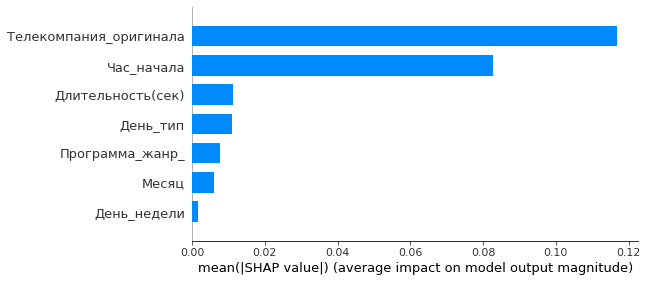

In [ ]:
explainer = shap.TreeExplainer(catmodel, feature_dependence="interventional")
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

Наибольшее влияние на рейтинг оказывает телекомпания и час начала передачи. Остальные факторы имеют значительно меньший вес

Есть предположение, что ошибка связана с малым количество данных (признаков) и прежде всего некатегорийных.

Построим скоринговую модель и определим вероятность, что рейтинг будет больше или меньше среднего медианного рейтинга по всем программам. Возможно, ошибка будет меньше при категорийном прогнозе.
Для этого используем Catclassifier

## CatBoostClassifier 

Преобразуем данные:
1. Добавим столбец для классификации (1 если >= медиана по все данным TVR,  0 в противном случае)



In [ ]:
TVR_file_CBC = TVR_file[TVR_file['TVR'] != 0 ]
TVR_median = TVR_file_CBC['TVR'].median()
TVR_file_CBC["TVR_more_than_median"] = TVR_file_CBC['TVR'].apply(lambda x: 1 if x >= TVR_median else 0)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
from catboost import CatBoostClassifier
X = TVR_file_CBC.loc[:,["Длительность(сек)", 'Программа_жанр_','Месяц','Телекомпания_оригинала','День_недели','Час_начала','День_тип']]
y = TVR_file_CBC["TVR_more_than_median"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 123)

categorical_features_indices = np.where(X.dtypes != np.int)[0]
categorical_features_indices = list(categorical_features_indices)

train_dataset = Pool(data=X_train,                   label=y_train,
                     cat_features=categorical_features_indices)

eval_dataset = Pool(data=X_test,
                    label=y_test,
                    cat_features=categorical_features_indices)


estimatorCBC = CatBoostClassifier(iterations=100,learning_rate=0.7, depth=12)
estimatorCBC.fit(train_dataset)


print("accuracy CBC", sum(np.array(y_test) == estimatorCBC.predict(eval_dataset))/len(np.array(y_test)))

0:	learn: 0.4043692	total: 867ms	remaining: 1m 25s
1:	learn: 0.3322567	total: 1.68s	remaining: 1m 22s
2:	learn: 0.2957321	total: 2.46s	remaining: 1m 19s
3:	learn: 0.2799171	total: 3.24s	remaining: 1m 17s
4:	learn: 0.2641398	total: 4.01s	remaining: 1m 16s
5:	learn: 0.2566648	total: 4.76s	remaining: 1m 14s
6:	learn: 0.2518835	total: 5.51s	remaining: 1m 13s
7:	learn: 0.2463840	total: 6.29s	remaining: 1m 12s
8:	learn: 0.2426371	total: 7.08s	remaining: 1m 11s
9:	learn: 0.2407295	total: 7.85s	remaining: 1m 10s
10:	learn: 0.2382010	total: 8.6s	remaining: 1m 9s
11:	learn: 0.2364065	total: 9.36s	remaining: 1m 8s
12:	learn: 0.2353871	total: 10.1s	remaining: 1m 7s
13:	learn: 0.2345771	total: 10.9s	remaining: 1m 7s
14:	learn: 0.2335125	total: 11.7s	remaining: 1m 6s
15:	learn: 0.2327223	total: 12.4s	remaining: 1m 5s
16:	learn: 0.2318640	total: 13.2s	remaining: 1m 4s
17:	learn: 0.2310922	total: 14s	remaining: 1m 3s
18:	learn: 0.2304646	total: 14.8s	remaining: 1m 3s
19:	learn: 0.2301410	total: 15.6s	

Также визуализирум с помощью SHAP

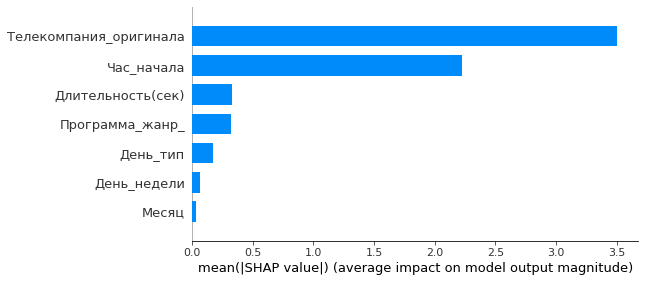

In [ ]:
explainer = shap.TreeExplainer(estimatorCBC, feature_dependence="interventional")
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

По скоринговой модели ошибку не удалось сильно оптимизировать - она составляет 90%

По скоринговой карте мы также имеем наибольшую зависимость рейтинга от телекомпании, далее час начала. Остальные критерии имеют меньшую важность.